In [1]:
# Imports
# To ignore all warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as PCA
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa import seasonal

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/open-iit-data-analytics-2023-kgp/Manual_extraction.csv
/kaggle/input/open-iit-data-analytics-2023-kgp/Automatic_extraction.csv


In [3]:
def parser(s):
    return datetime.strptime(s, '%d-%m-%Y')

def plot_time_graph(a = None , b = None , title = "Graph" , y = 'Freq'):
    plt.figure(figsize=(40,20))
    plt.plot(a)
    if (b != None):
      plt.plot(b)
    plt.title(title, fontsize=32)
    plt.ylabel(y, fontsize=24)
    start_date = datetime(2010,1,1)
    end_date = datetime(2023,12,1)
    for year in range(start_date.year,end_date.year):
        plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

start_date = datetime(2010,1,1)
end_date = datetime(2022,11,1)

df = pd.read_csv('/kaggle/input/open-iit-data-analytics-2023-kgp/Automatic_extraction.csv', parse_dates=[0], index_col=0, date_parser=parser)
df2 = pd.read_csv('/kaggle/input/open-iit-data-analytics-2023-kgp/Manual_extraction.csv', parse_dates=[0], index_col=0, date_parser=parser)
tourist = pd.DataFrame(df['No of Tourist']).set_index(df.index)
df = df.dropna()


In [4]:
# Chosing  tourist in data
tourist = tourist.asfreq(pd.infer_freq(tourist.index))
lim_tourist = tourist[start_date:end_date]
lim_df = df[start_date:end_date]
first_diff = tourist.diff()[1:]

# Ploting Shimla Tourist

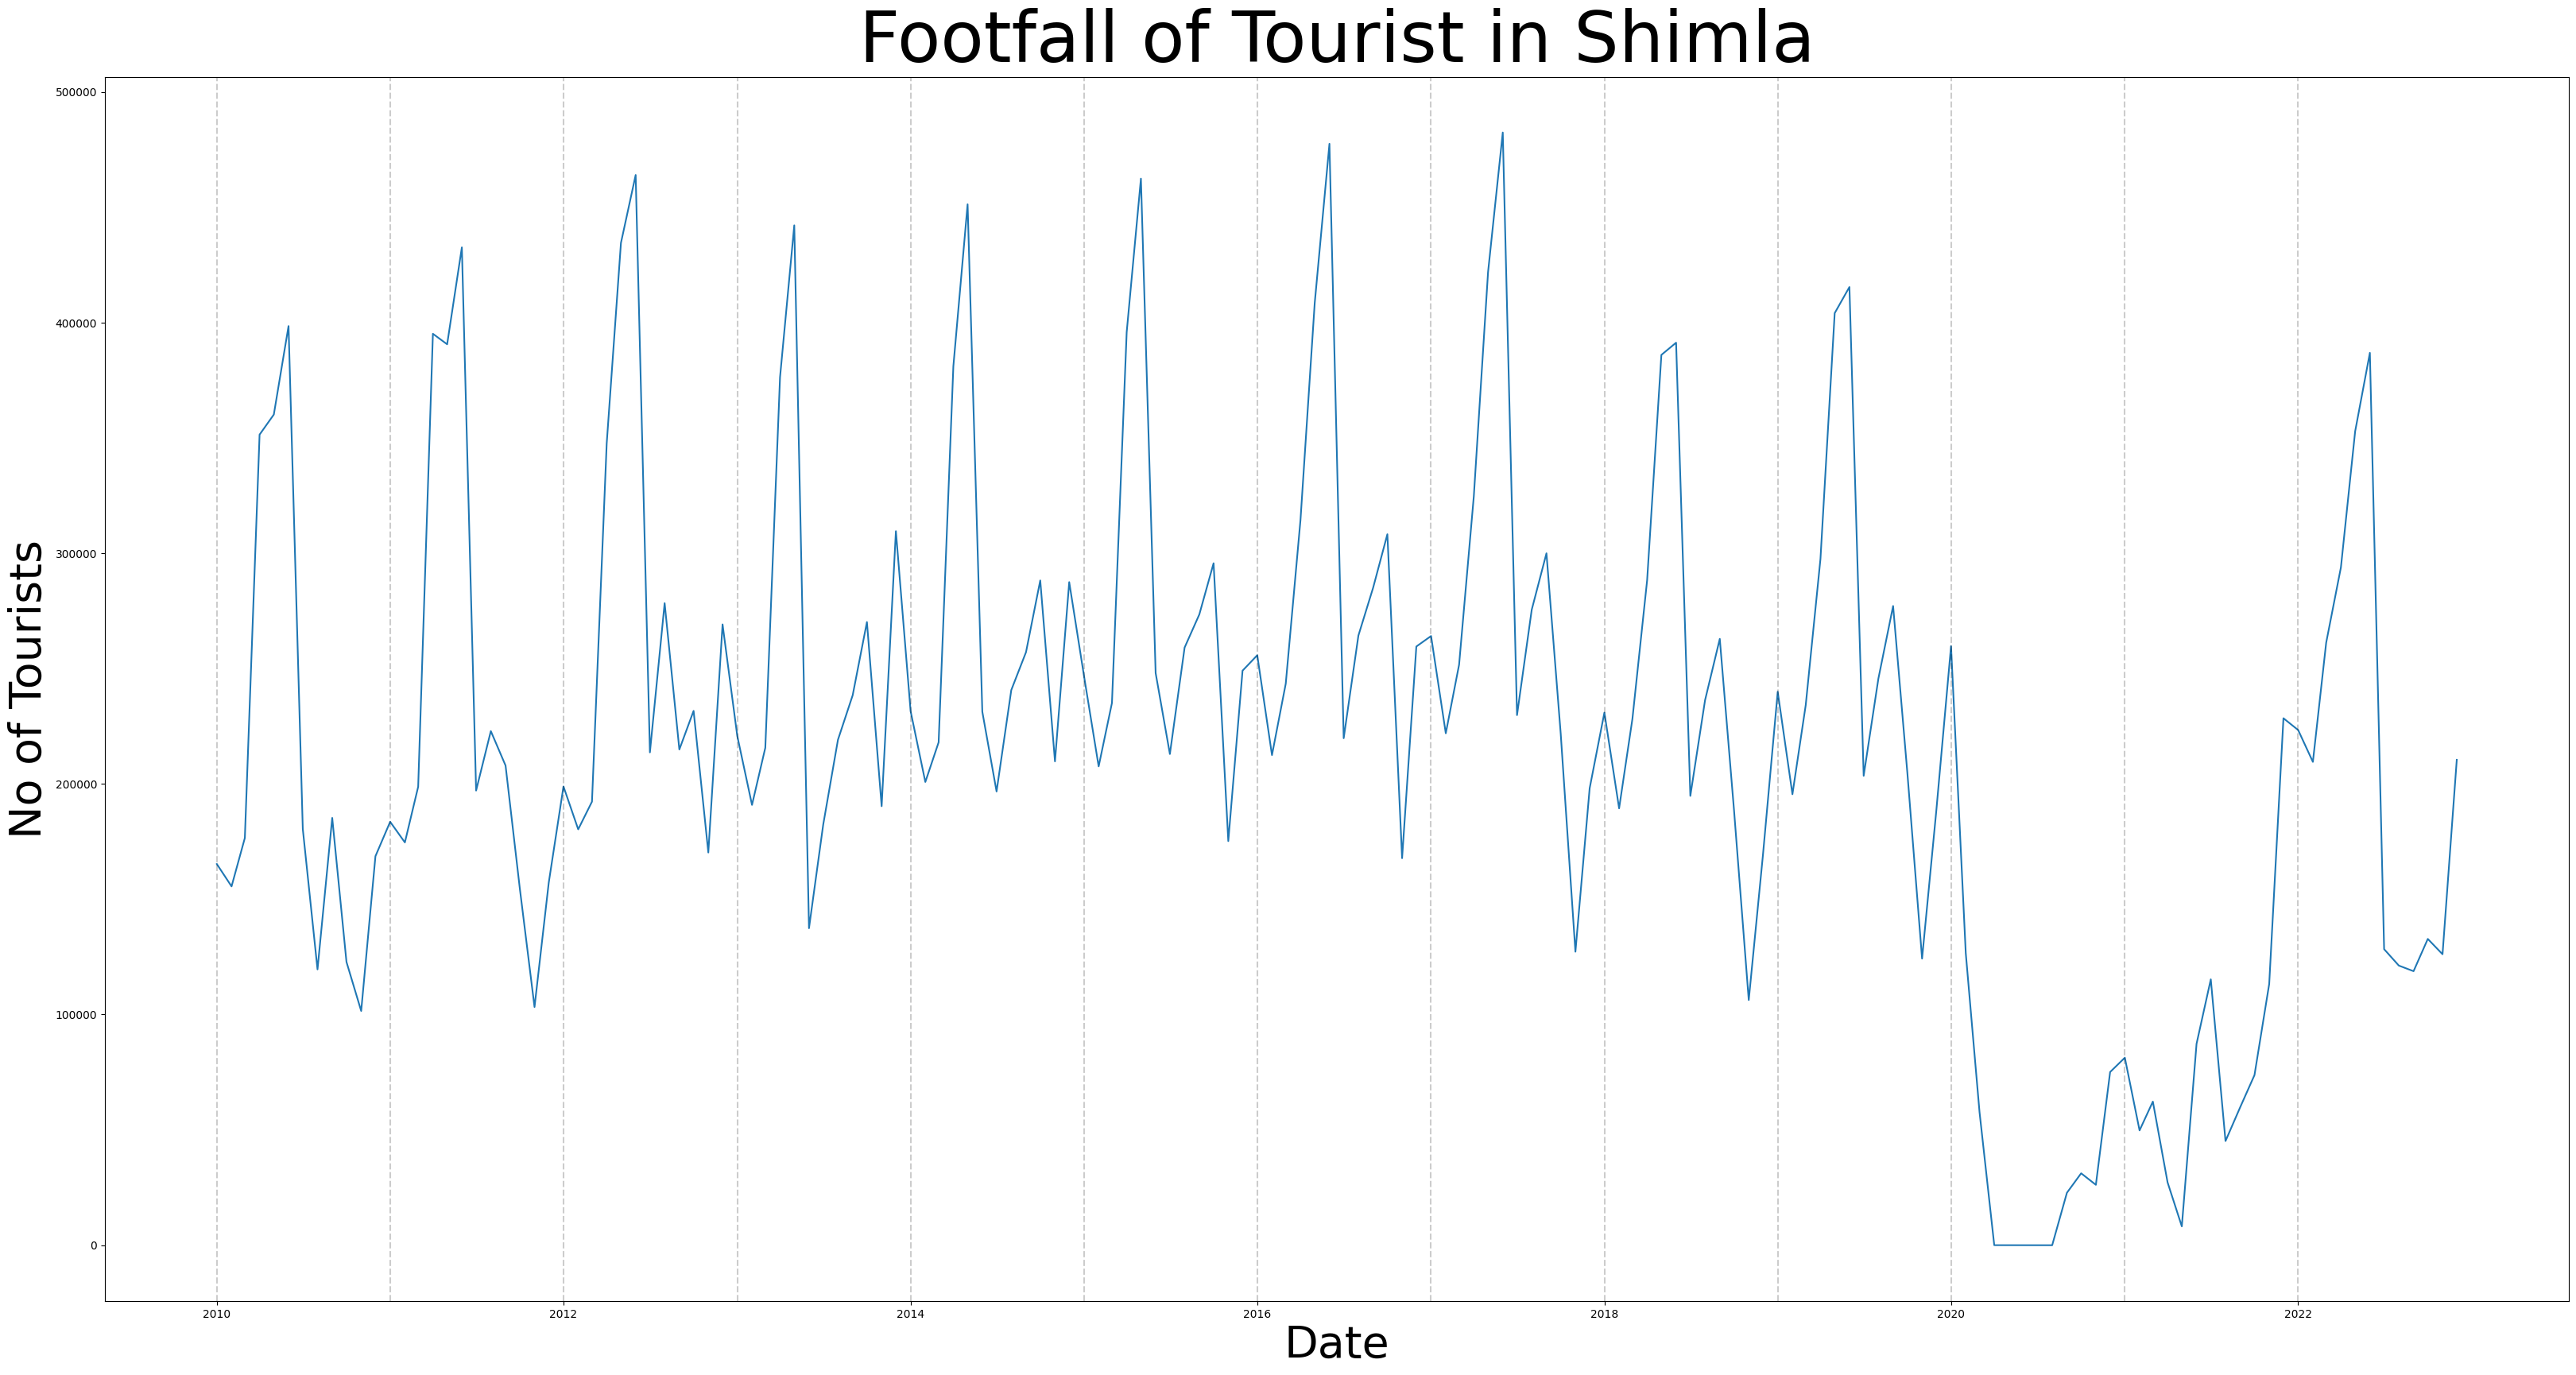

In [5]:
# plot_time_graph(a = tourist , title = 'Tourist Footfall per Month')
plt.figure(figsize=(40,20))
plt.plot(tourist)
# if (b != None):
#   plt.plot(b)
plt.title('Footfall of Tourist in Shimla', fontsize= 64)
plt.ylabel('No of Tourists', fontsize=40)
plt.xlabel('Date', fontsize=40)
start_date = datetime(2010,1,1)
end_date = datetime(2023,12,1)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
    # plt.text(pd.to_datetime(str(year)+'-01-01'),4,pd.to_datetime(str(year)+'-01-01'), fontsize=12)


# Plotting First Difference of No. of tourist

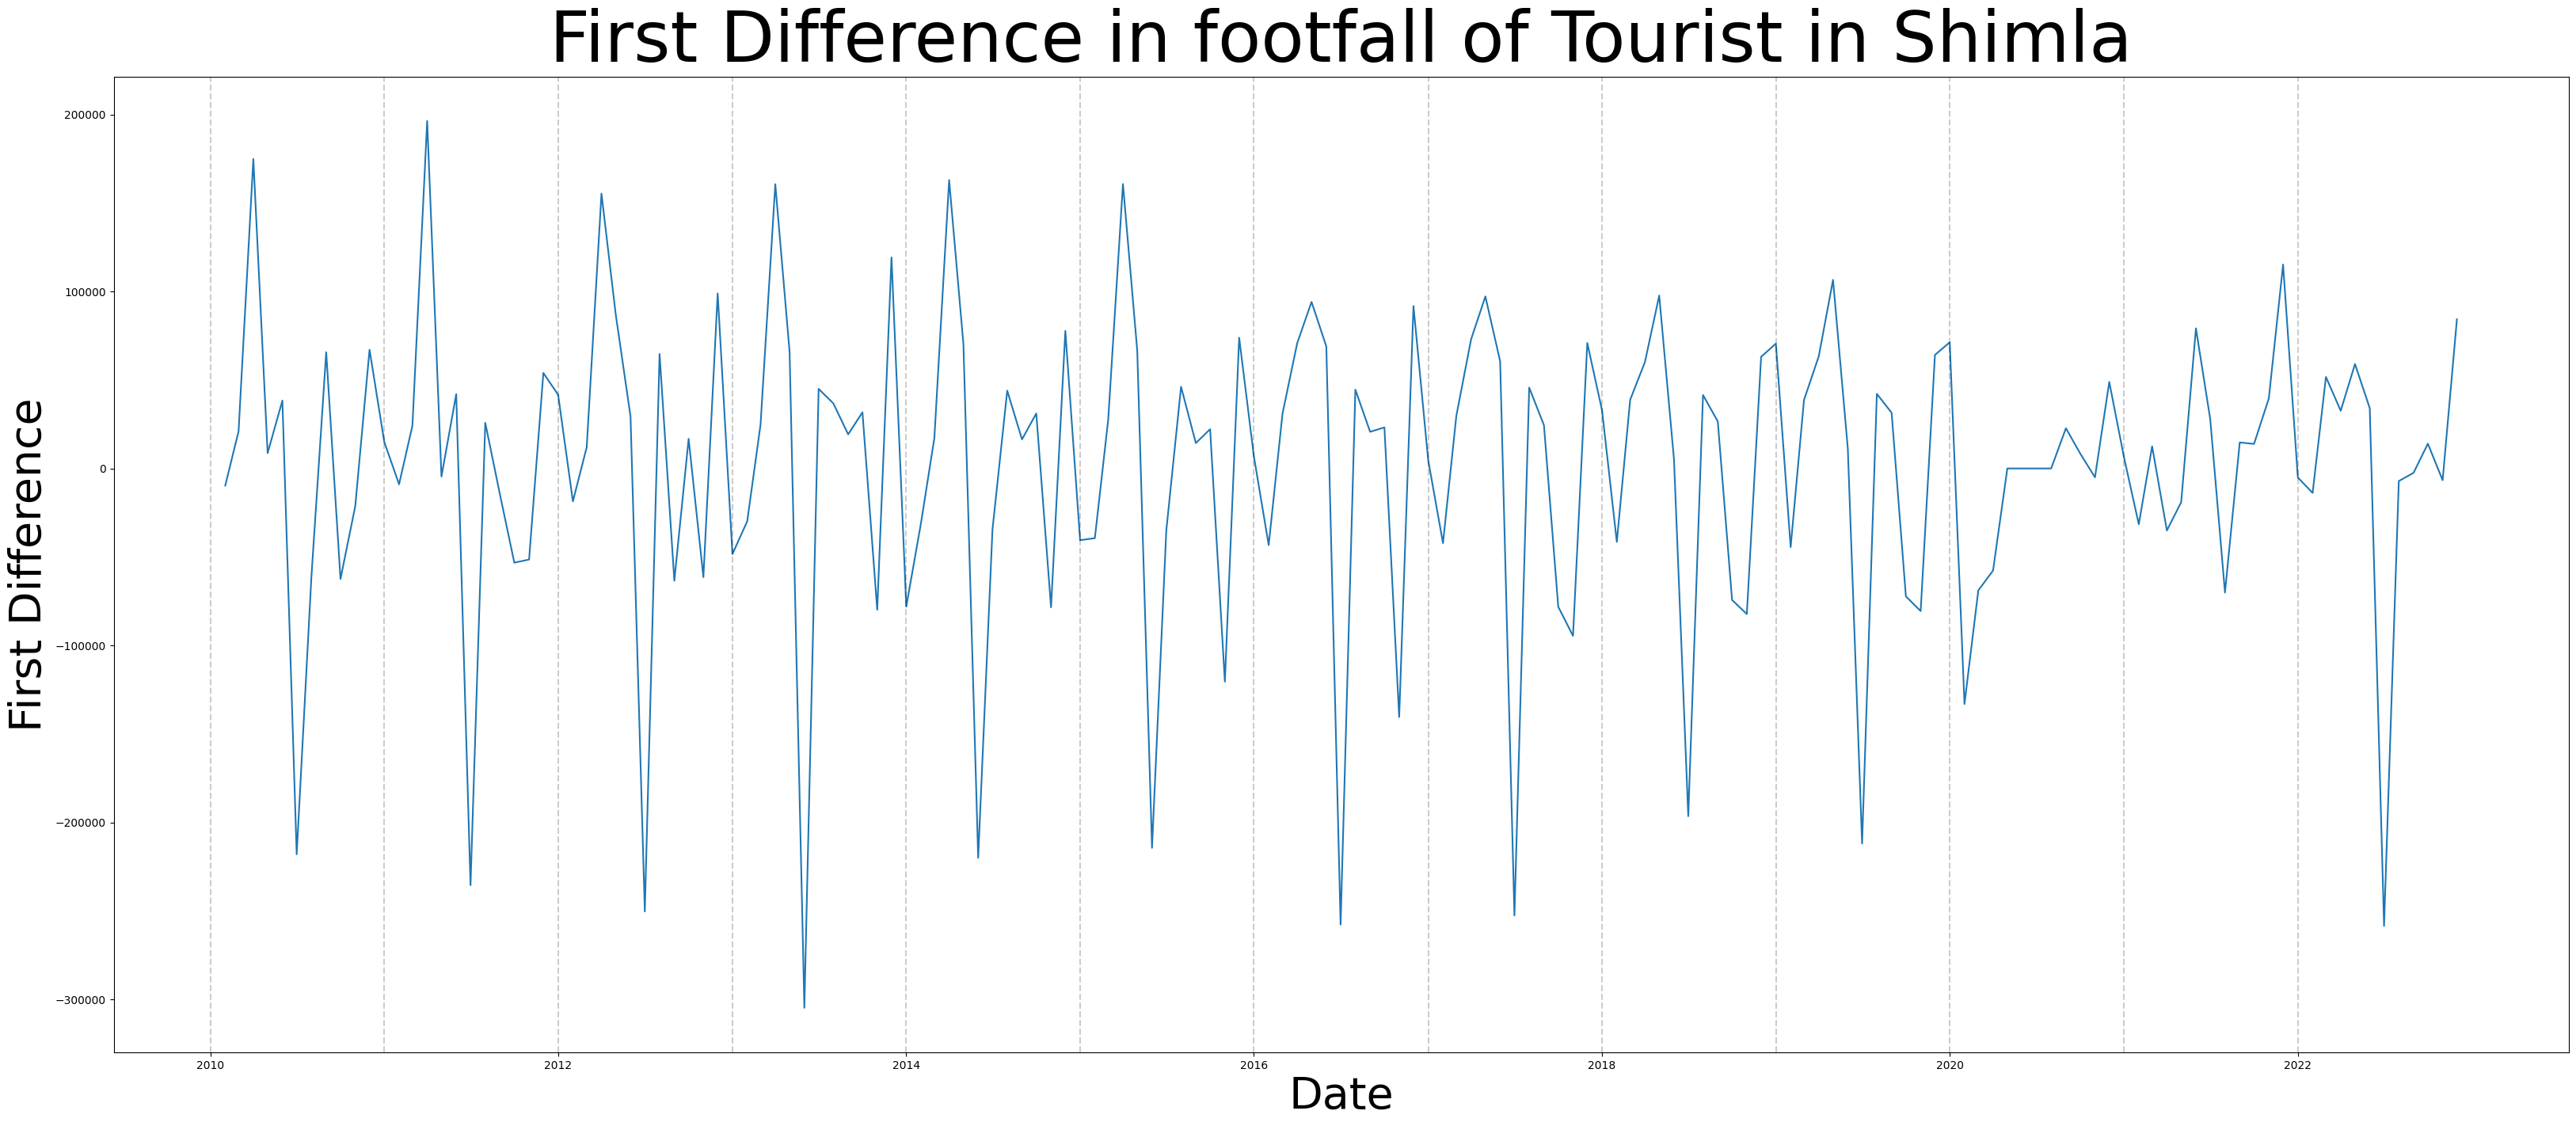

In [6]:
# plot_time_graph(a = tourist , title = 'Tourist Footfall per Month')
plt.figure(figsize=(40,16))
plt.plot(first_diff)
# if (b != None):
#   plt.plot(b)
plt.title('First Difference in footfall of Tourist in Shimla', fontsize= 64)
plt.ylabel('First Difference', fontsize=40)
plt.xlabel('Date', fontsize=40)
start_date = datetime(2010,1,1)
end_date = datetime(2023,12,1)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# Plotting Covarience Matrix Of Trends.

Seosonality Decomposition

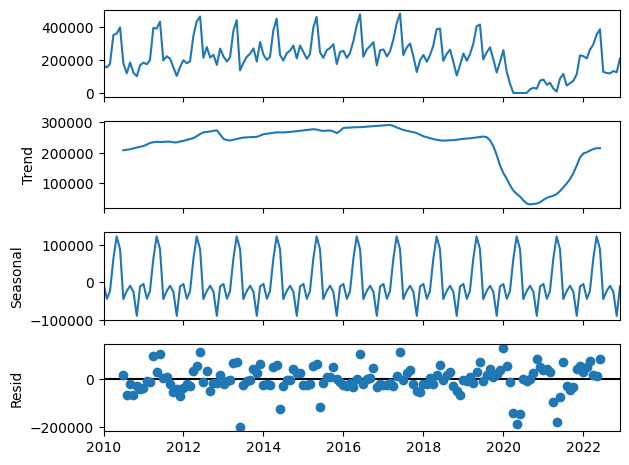

In [7]:
from statsmodels.tsa import seasonal
decompose_data = seasonal.seasonal_decompose(tourist, model="additive")
decompose_data.plot();

# Automated

PCA

In [8]:
# Model Application
pca=PCA(n_components=1)
reduced_data = pca.fit_transform(df.drop(columns = 'No of Tourist'))
reduced_data = pd.DataFrame(reduced_data)

# Data to CSV
# reduced_data.to_csv('pca2.csv')


#convert index column to datetime format
reduced_data.index = pd.to_datetime(df.index)
pd.concat([reduced_data,df['No of Tourist']], axis=1)

,0,No of Tourist
Date,,
2010-01-01,37.836683,165247
2010-02-01,19.332288,155554
2010-03-01,-97.873406,176551
2010-04-01,-191.894094,351393
2010-05-01,-206.575965,360096
...,...,...
2022-08-01,104.168458,121224
2022-09-01,82.475961,118791
2022-10-01,79.085790,132786


Code for PCA Graphs

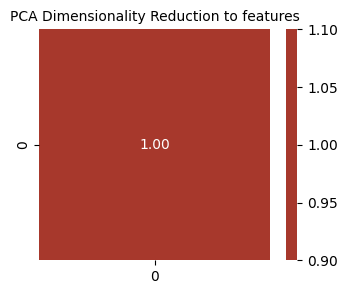

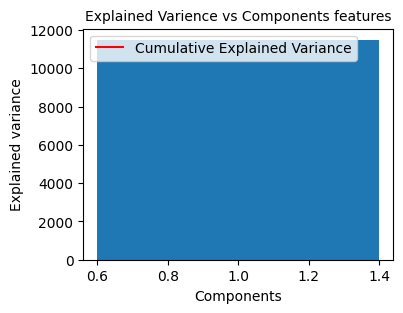

In [9]:
## Code for Corr matrix
pd.concat([reduced_data,df['No of Tourist']], axis=1)
matrix = reduced_data.corr(method = 'spearman')
plt.figure(figsize=(4,3))
plt.title(('PCA Dimensionality Reduction to features'), fontsize= 10)
plt.xlabel('Covariance')

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix, center=0, annot=True,
                fmt='.2f', square=True, cmap=cmap)



# Explained Varience Graph
plt.figure(figsize=(4,3))
plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ )
plt.title(('Explained Varience vs Components features'), fontsize= 10)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
        np.cumsum(pca.explained_variance_),
        c='red',
        label="Cumulative Explained Variance")
plt.legend(loc='upper left')

**Sarimax Model**


with covid data

(p,d,q) =  (3, 1, 1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24478D+01    |proj g|=  3.37757D-02

At iterate    5    f=  1.24400D+01    |proj g|=  1.21602D-01

At iterate   10    f=  1.24143D+01    |proj g|=  2.42305D-02

At iterate   15    f=  1.24124D+01    |proj g|=  2.17879D-04

At iterate   20    f=  1.24124D+01    |proj g|=  8.04113D-04

At iterate   25    f=  1.24118D+01    |proj g|=  1.09616D-02

At iterate   30    f=  1.24075D+01    |proj g|=  9.74978D-04


 This problem is unconstrained.



At iterate   35    f=  1.24050D+01    |proj g|=  1.05212D-02

At iterate   40    f=  1.24039D+01    |proj g|=  4.03161D-03

At iterate   45    f=  1.24038D+01    |proj g|=  1.40474D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     73      1     0     0   1.405D-06   1.240D+01
  F =   12.403837985011425     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Fitting Time: 0.3183174133300781
RMSE = 80611.64153939544
Mean Absolute Error: 68386.33068545445
Mean Absolute Percentage Error (MAPE): 70.32498542152533 %
Mean Absolute Scaled Error (MASE): 0.5778966462141096
Percentage Matched: 7

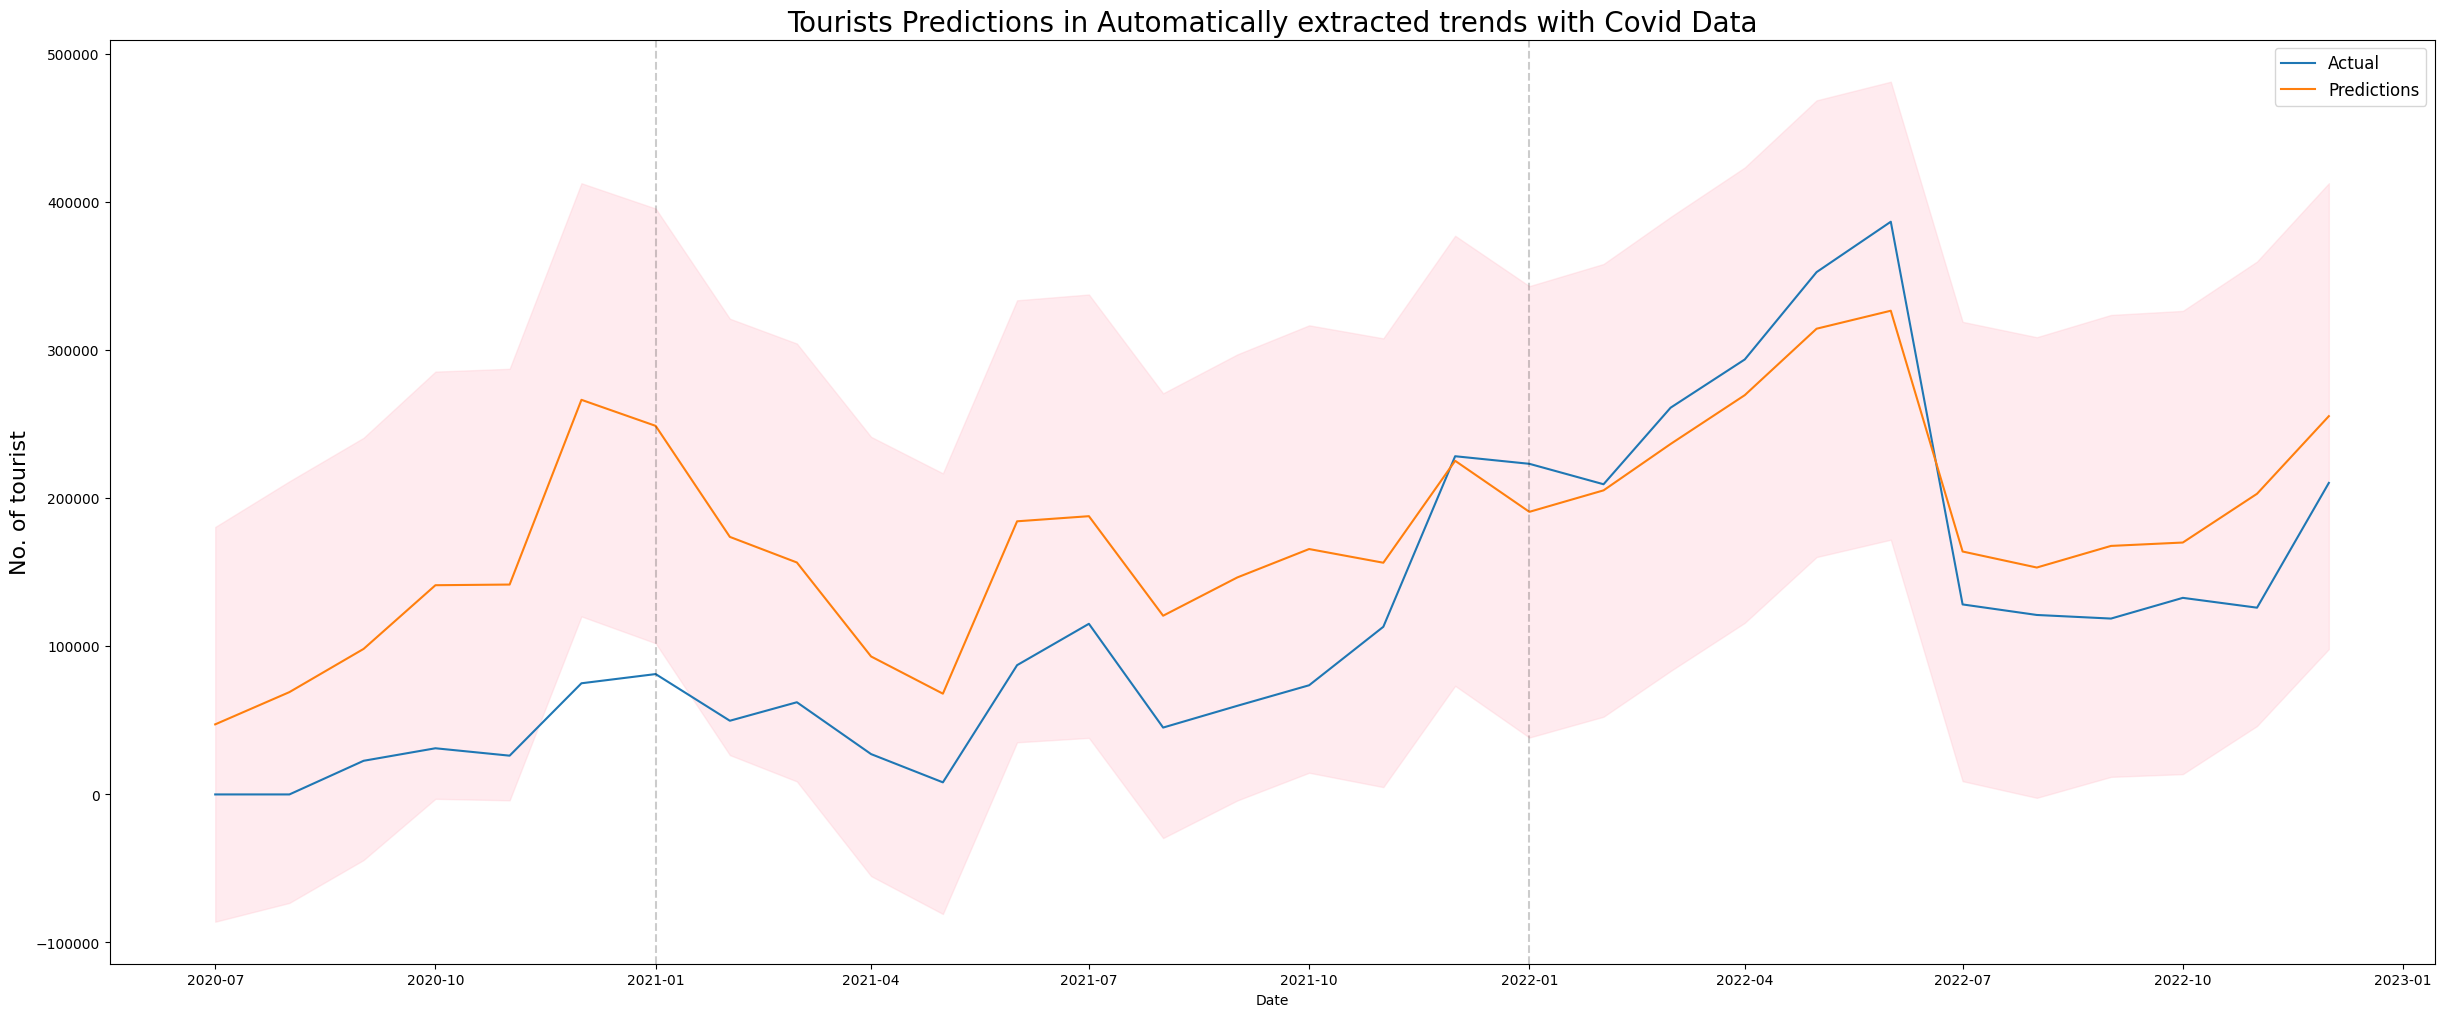

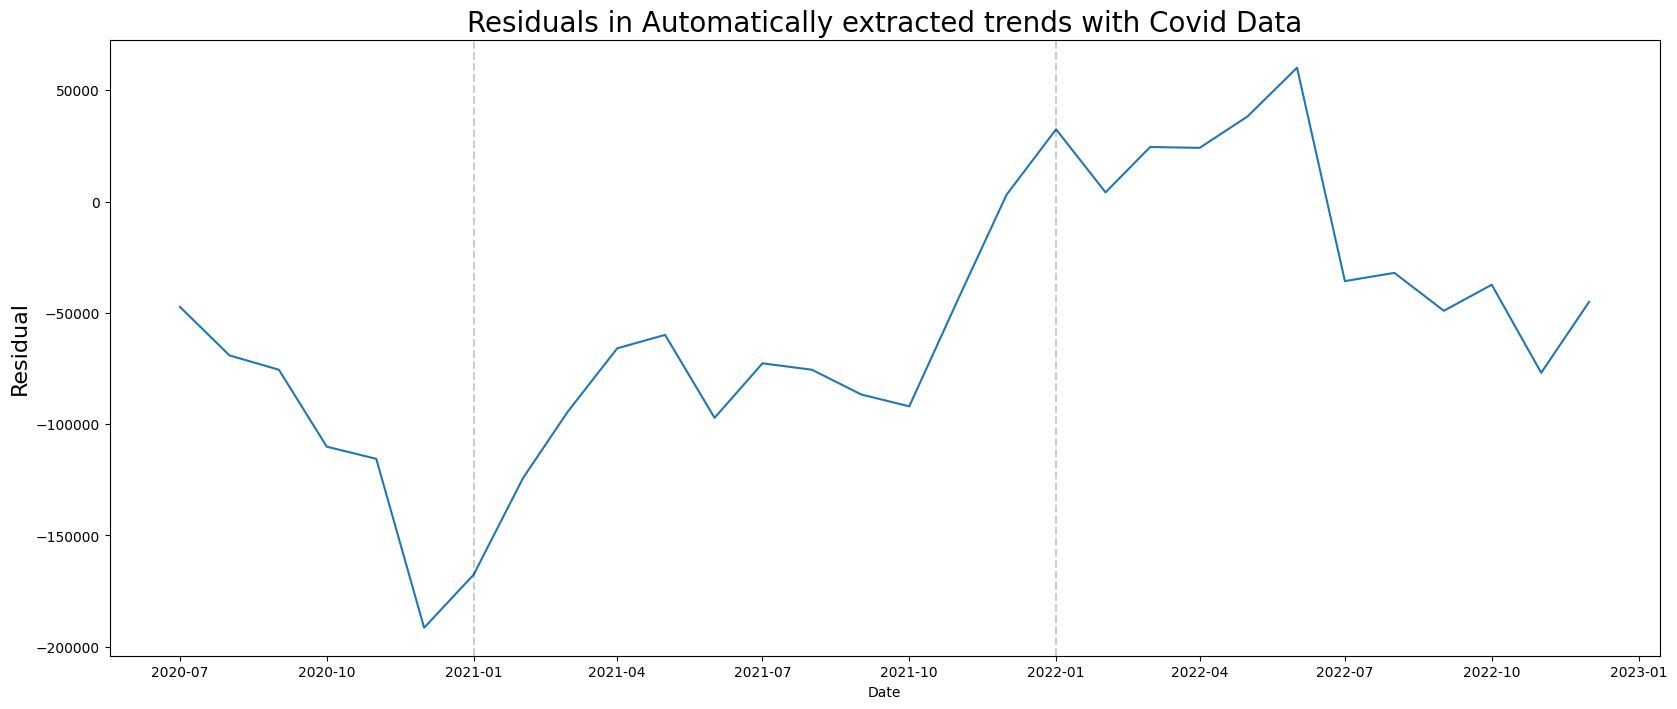

In [10]:
train_end = datetime(2020,6,1)
test_end = datetime(2022,12,1)
lim_tourist = tourist[start_date:test_end]
lim_df = reduced_data[start_date:test_end]

train_data = lim_tourist[:train_end]
test_data = lim_tourist[train_end + timedelta(days=1):test_end]
# test_data = pd.DataFrame(test_data, index=pd.date_range(start=(train_end + timedelta(days=1)).strftime('%m-%d-%Y'), end=test_end.strftime('%m-%d-%Y'), freq='MS'))

xtrain_data = (lim_df[:len(train_data)])
xtest_data = (lim_df[len(train_data):])


# To ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# My Variables

my_order = (3,1,1)
my_seasonal_order = (0, 0, 0, 0)
print('(p,d,q) = ', my_order)


#Define Model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order, exog=xtrain_data)

# Time to implement model and Fit Model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)
# print(model_fit.summary())

#Getting Predictions
predictions_ci = (model_fit.get_forecast(len(test_data), exog = xtest_data)).conf_int()
predictions = model_fit.forecast(len(test_data), exog = xtest_data)
predictions = pd.Series(predictions, index=test_data.index)
predictions = pd.DataFrame(predictions)

#Getting residuals
residuals= test_data['No of Tourist'] - predictions['predicted_mean']
residuals
residuals = pd.DataFrame(residuals)



#Getting Error in Data
rmse = math.sqrt(mean_squared_error(test_data , predictions))
print('RMSE =',rmse )

# Calculate MAE
mae = mean_absolute_error(test_data , predictions)
print("Mean Absolute Error:", mae)

# Calculate MAPE and MASE
mape = np.mean(np.abs((test_data.values - predictions.values ) / ((test_data.values + predictions.values)/2))) * 100
print("Mean Absolute Percentage Error (MAPE):", mape, "%")
seasonal_naive = test_data['No of Tourist'].diff(12).abs().mean()
mase = mae / (seasonal_naive if seasonal_naive else mae)
print("Mean Absolute Scaled Error (MASE):", mase)


#Getting Trends Matching Data
first_diff_pred = predictions.diff()[1:]
first_diff_test = test_data.diff()[1:]
e = pd.DataFrame(dtype = 'int64')

first_diff_pred = np.sign(np.sign(first_diff_pred['predicted_mean']))
first_diff_test = np.sign(np.sign(first_diff_test['No of Tourist']))
e =  first_diff_test * first_diff_pred
print(f"Percentage Matched: {((e > 0).mean()) * 100}")


# Plotting Predictions

plt.figure(figsize=(30,12))

plt.plot(test_data)
plt.plot(predictions)
plt.fill_between(predictions_ci.index, predictions_ci.iloc[:, 0], predictions_ci.iloc[:, 1], color='pink', alpha=0.3)

plt.legend(('Actual', 'Predictions'), fontsize=12)

plt.title('Tourists Predictions in Automatically extracted trends with Covid Data', fontsize=20)
plt.ylabel('No. of tourist', fontsize=16)
plt.xlabel('Date')
for year in range(train_end.year+1,test_end.year+1):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.show()

# Plotting residuals
plt.figure(figsize=(20,8))
plt.plot(residuals)
plt.title((('Residuals in Automatically extracted trends with Covid Data')), fontsize=20)
plt.ylabel('Residual', fontsize=16)
plt.xlabel('Date')
for year in range(train_end.year +1,test_end.year+1):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.show()




Without Covid Data

(p,d,q) =  (3, 1, 1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23247D+01    |proj g|=  1.32785D-01

At iterate    5    f=  1.23033D+01    |proj g|=  1.19359D-02

At iterate   10    f=  1.23019D+01    |proj g|=  3.59259D-02

At iterate   15    f=  1.22928D+01    |proj g|=  1.00693D-02


 This problem is unconstrained.



At iterate   20    f=  1.22921D+01    |proj g|=  1.38307D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     22     25      1     0     0   5.248D-05   1.229D+01
  F =   12.292093408944220     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Fitting Time: 0.27269768714904785
RMSE = 39500.355270074295
Mean Absolute Error: 31043.492977579674
Mean Absolute Percentage Error (MAPE): 13.808125182760234 %
Mean Absolute Scaled Error (MASE): 2.26729782300828
Percentage Matched: 79.16666666666666


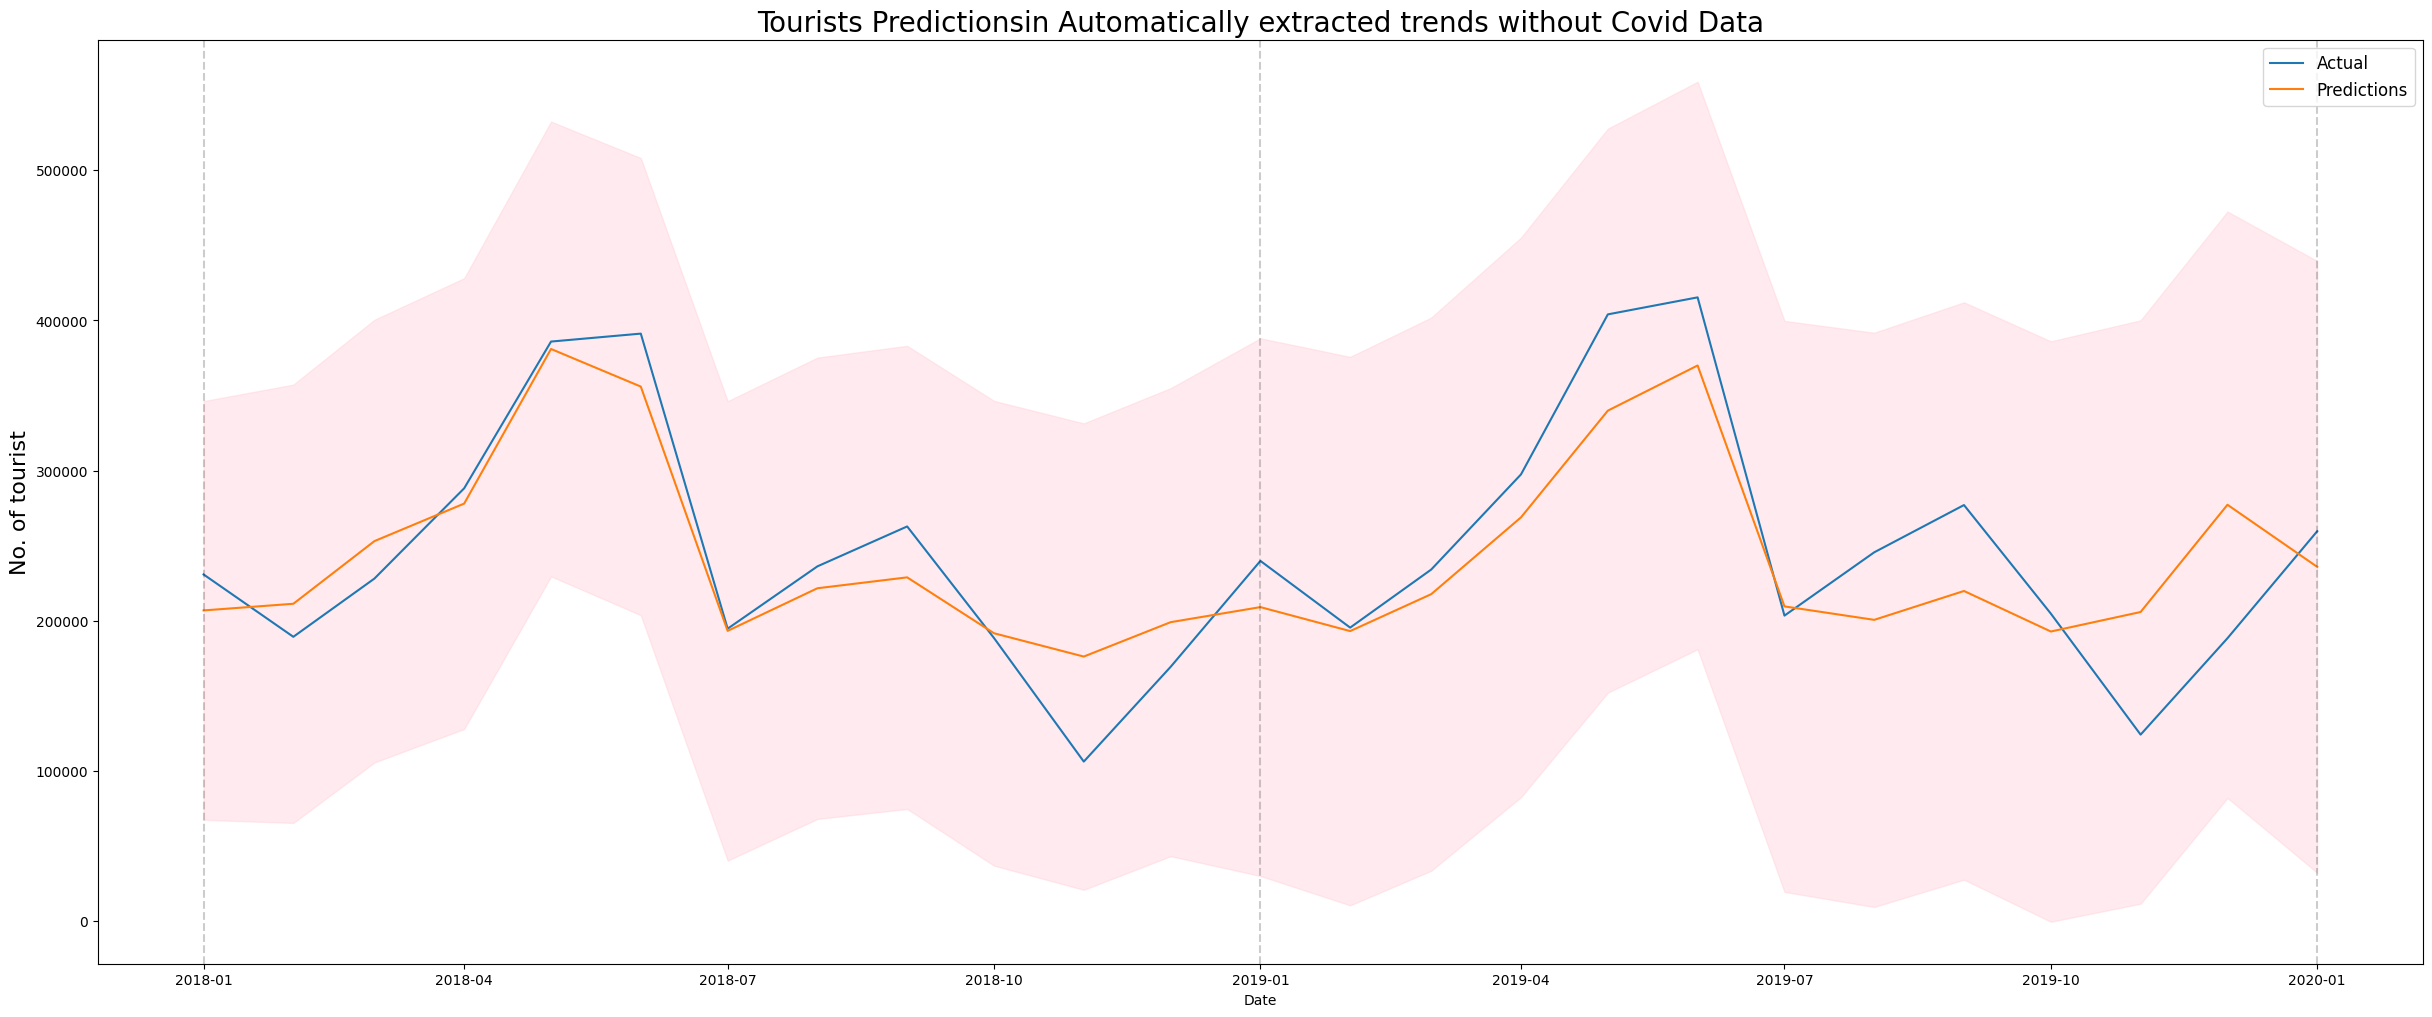

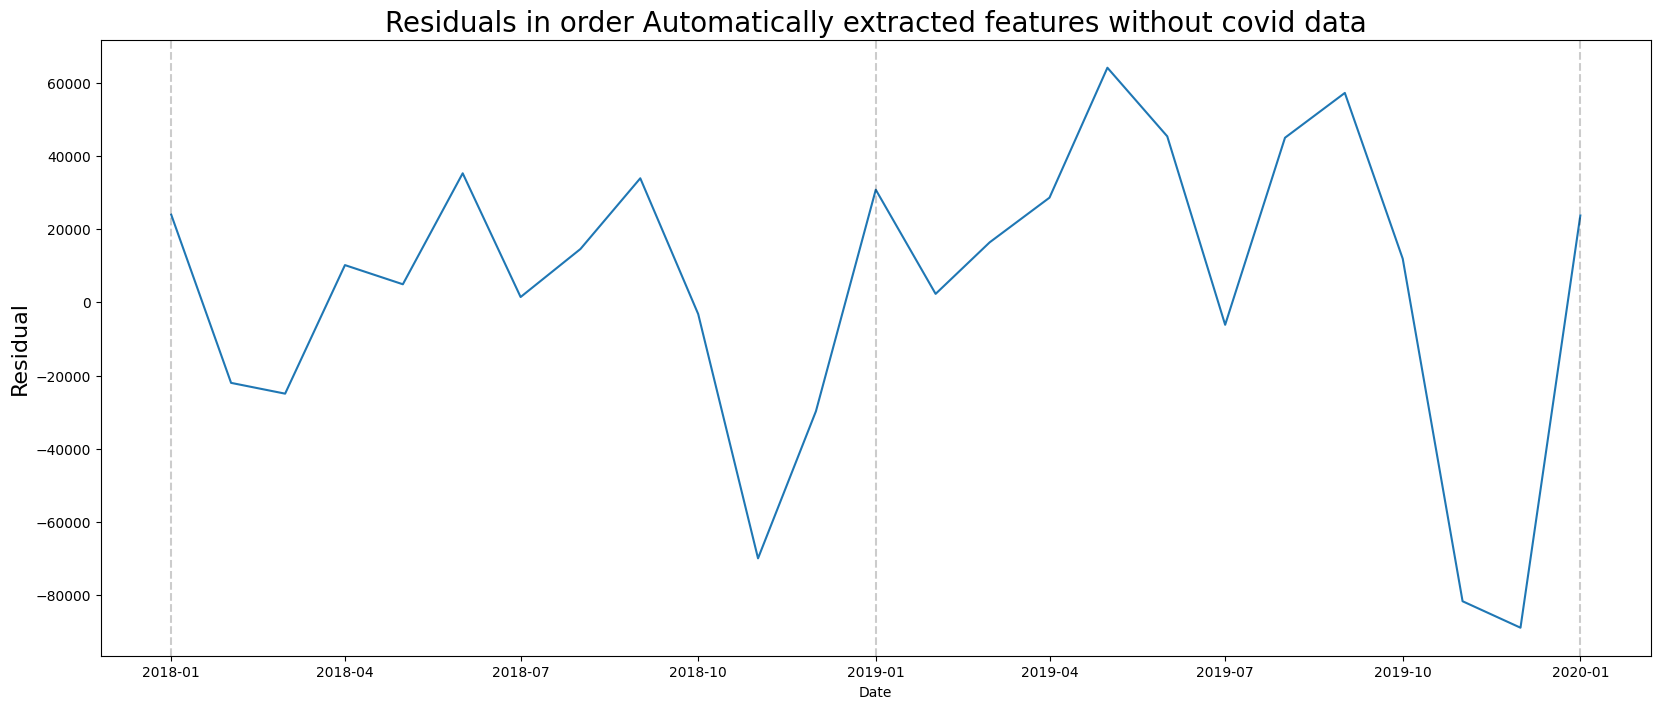

In [11]:
train_end = datetime(2017,12,1)
test_end = datetime(2020,1,1)
lim_tourist = tourist[start_date:test_end]
lim_df = reduced_data[start_date:test_end]

train_data = lim_tourist[:train_end]
test_data = lim_tourist[train_end + timedelta(days=1):test_end]
# test_data = pd.DataFrame(test_data, index=pd.date_range(start=(train_end + timedelta(days=1)).strftime('%m-%d-%Y'), end=test_end.strftime('%m-%d-%Y'), freq='MS'))

xtrain_data = (lim_df[:len(train_data)])
xtest_data = (lim_df[len(train_data):])


# To ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# My Variables

my_order = (3,1,1)
my_seasonal_order = (1, 0, 1, 12)
print('(p,d,q) = ', my_order)


#Define Model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order, exog=xtrain_data)

# Time to implement model and Fit Model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)
# print(model_fit.summary())

#Getting Predictions
predictions_ci = (model_fit.get_forecast(len(test_data), exog = xtest_data)).conf_int()
predictions = model_fit.forecast(len(test_data), exog = xtest_data)
predictions = pd.Series(predictions, index=test_data.index)
predictions = pd.DataFrame(predictions)

#Getting residuals
residuals= test_data['No of Tourist'] - predictions['predicted_mean']
residuals
residuals = pd.DataFrame(residuals)



#Getting Error in Data
rmse = math.sqrt(mean_squared_error(test_data , predictions))
print('RMSE =',rmse )

# Calculate MAE
mae = mean_absolute_error(test_data , predictions)
print("Mean Absolute Error:", mae)

# Calculate MAPE and MASE
mape = np.mean(np.abs((test_data.values - predictions.values) / ((test_data.values + predictions.values)/2))) * 100
print("Mean Absolute Percentage Error (MAPE):", mape, "%")
seasonal_naive = test_data['No of Tourist'].diff(12).abs().mean()
mase = mae / (seasonal_naive if seasonal_naive else mae)
print("Mean Absolute Scaled Error (MASE):", mase)


#Getting Trends Matching Data
first_diff_pred = predictions.diff()[1:]
first_diff_test = test_data.diff()[1:]
e = pd.DataFrame(dtype = 'int64')

first_diff_pred = np.sign(np.sign(first_diff_pred['predicted_mean']))
first_diff_test = np.sign(np.sign(first_diff_test['No of Tourist']))
e =  first_diff_test * first_diff_pred
print(f"Percentage Matched: {((e > 0).mean()) * 100}")


# Plotting Predictions

plt.figure(figsize=(30,12))

plt.plot(test_data)
plt.plot(predictions)
plt.fill_between(predictions_ci.index, predictions_ci.iloc[:, 0], predictions_ci.iloc[:, 1], color='pink', alpha=0.3)

plt.legend(('Actual', 'Predictions'), fontsize=12)

plt.title('Tourists Predictionsin Automatically extracted trends without Covid Data', fontsize=20)
plt.ylabel('No. of tourist', fontsize=16)
plt.xlabel('Date')
for year in range(train_end.year+1,test_end.year+1):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.show()

# Plotting residuals
plt.figure(figsize=(20,8))
plt.plot(residuals)
plt.title((('Residuals in order Automatically extracted features without covid data')), fontsize=20)
plt.ylabel('Residual', fontsize=16)
plt.xlabel('Date')
for year in range(train_end.year +1,test_end.year+1):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.show()



# Semi automatic

In [12]:
data = {
    'Tourism': [],
    'Traffic': [],
    'Lodging': []
}
fsa = pd.DataFrame(data)
tourism = df.loc[:, ['shimla tourism','himachal tourism','manali tourism','shimla tourism places','delhi tourism','hotel in shimla.3','shimla tourism packages','manali tourism places','himachal tourism hotel shimla','shimla hotels.3','himachal tourism.1','manali tourism.1','shimla tourism places.1','delhi tourism.1','hotel in shimla.1.1','shimla tourism packages.1','manali tourism places.1','himachal tourism hotel shimla.1','shimla hotels.1.1','himachal tourism.2','manali tourism.2','shimla tourism places.2','delhi tourism.2','hotel in shimla.2.1','shimla tourism packages.2','manali tourism places.2','himachal tourism hotel shimla.2']]
travel = df.loc[:, ['shimla hotels.2.1','shimla india','tour and travel','shimla hotel.3','shimla india.1','tour and travel.1','shimla hotel.1','shimla india.2','tour and travel.2','shimla hotel.2']]
lodging = df.loc[:, ['shimla hotel', 'hotel in shimla', 'manali hotel', 'shimla hotels', 'hotels in shimla', 'hotel in manali', 'resort in shimla', 'hotel in shimla.1', 'manali hotel.1', 'shimla hotels.1', 'hotels in shimla.1', 'hotel in manali.1', 'resort in shimla.1', 'hotel in shimla.2', 'manali hotel.2', 'shimla hotels.2', 'hotels in shimla.2', 'hotel in manali.2', 'resort in shimla.2']]
tourism = pd.DataFrame(tourism)
travel = pd.DataFrame(travel)
lodging = pd.DataFrame(lodging)
# tourism = df['shimla tourism','himachal tourism','manali tourism','shimla tourism places','delhi tourism','hotel in shimla.3','shimla tourism packages','manali tourism places','himachal tourism hotel shimla','shimla hotels.3','himachal tourism.1','manali tourism.1','shimla tourism places.1','delhi tourism.1','hotel in shimla.1.1','shimla tourism packages.1','manali tourism places.1','himachal tourism hotel shimla.1','shimla hotels.1.1','himachal tourism.2','manali tourism.2','shimla tourism places.2','delhi tourism.2','hotel in shimla.2.1','shimla tourism packages.2','manali tourism places.2','himachal tourism hotel shimla.2']
# travel = df['shimla hotels.2.1','shimla india','tour and travel','shimla hotel.3','shimla india.1','tour and travel.1','shimla hotel.1','shimla india.2','tour and travel.2','shimla hotel.2']
# lodging = df['shimla hotel', 'hotel in shimla', 'manali hotel', 'shimla hotels', 'hotels in shimla', 'hotel in manali', 'resort in shimla', 'hotel in shimla.1', 'manali hotel.1', 'shimla hotels.1', 'hotels in shimla.1', 'hotel in manali.1', 'resort in shimla.1', 'hotel in shimla.2', 'manali hotel.2', 'shimla hotels.2', 'hotels in shimla.2', 'hotel in manali.2', 'resort in shimla.2']



In [13]:
# Model Application
pca=PCA(n_components=1)
tourism = pca.fit_transform(tourism)
tourism = pd.DataFrame(tourism)
travel = pca.fit_transform(travel)
travel = pd.DataFrame(travel)
lodging = pca.fit_transform(lodging)
lodging = pd.DataFrame(lodging)
#convert index column to datetime format
tourism.index = pd.to_datetime(df.index)
travel.index = pd.to_datetime(df.index)
lodging.index = pd.to_datetime(df.index)
fsa = pd.concat([tourism,travel,lodging,df['No of Tourist']], axis=1)

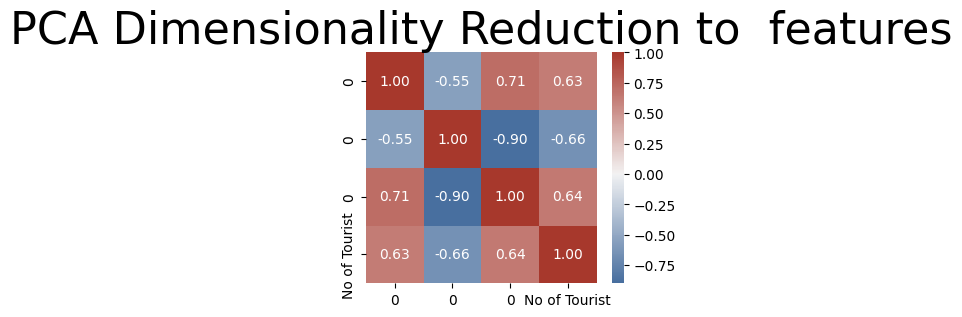

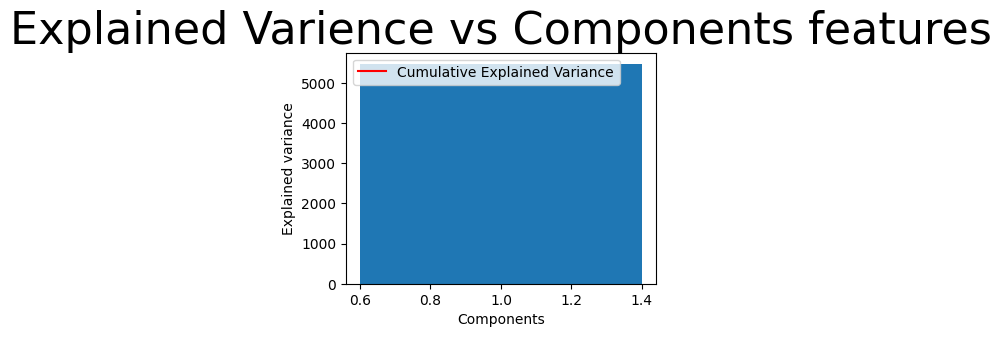

In [14]:
## Code for Corr matrix
matrix = fsa.corr(method = 'spearman')
plt.figure(figsize=(4,3))
plt.title(('PCA Dimensionality Reduction to  features'), fontsize= 32)
plt.xlabel('Covariance')

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix, center=0, annot=True,
                fmt='.2f', square=True, cmap=cmap)



# Explained Varience Graph
plt.figure(figsize=(4,3))
plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ )
plt.title(('Explained Varience vs Components features'), fontsize= 32)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
        np.cumsum(pca.explained_variance_),
        c='red',
        label="Cumulative Explained Variance")
plt.legend(loc='upper left')

with covid data

(p,d,q) =  (3, 1, 1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24516D+01    |proj g|=  3.13224D-02

At iterate    5    f=  1.24501D+01    |proj g|=  3.45021D-02

At iterate   10    f=  1.24262D+01    |proj g|=  9.32378D-02

At iterate   15    f=  1.24103D+01    |proj g|=  2.80422D-03

At iterate   20    f=  1.24102D+01    |proj g|=  1.08698D-04

At iterate   25    f=  1.24101D+01    |proj g|=  3.84509D-03

At iterate   30    f=  1.24058D+01    |proj g|=  1.88852D-02


 This problem is unconstrained.



At iterate   35    f=  1.24045D+01    |proj g|=  7.32356D-04
  ys=-1.539E-03  -gs= 1.857E-04 BFGS update SKIPPED

At iterate   40    f=  1.24031D+01    |proj g|=  1.99782D-02

At iterate   45    f=  1.24026D+01    |proj g|=  1.06660D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     49     62      1     1     0   5.729D-05   1.240D+01
  F =   12.402581588744960     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Fitting Time: 0.34870243072509766
RMSE = 75488.69263781176
Mean Absolute Error: 62524.235451165325
Mean Absolute Percentage Error (MAPE): 67.65414821835093 %
Mean Absolute Scaled 

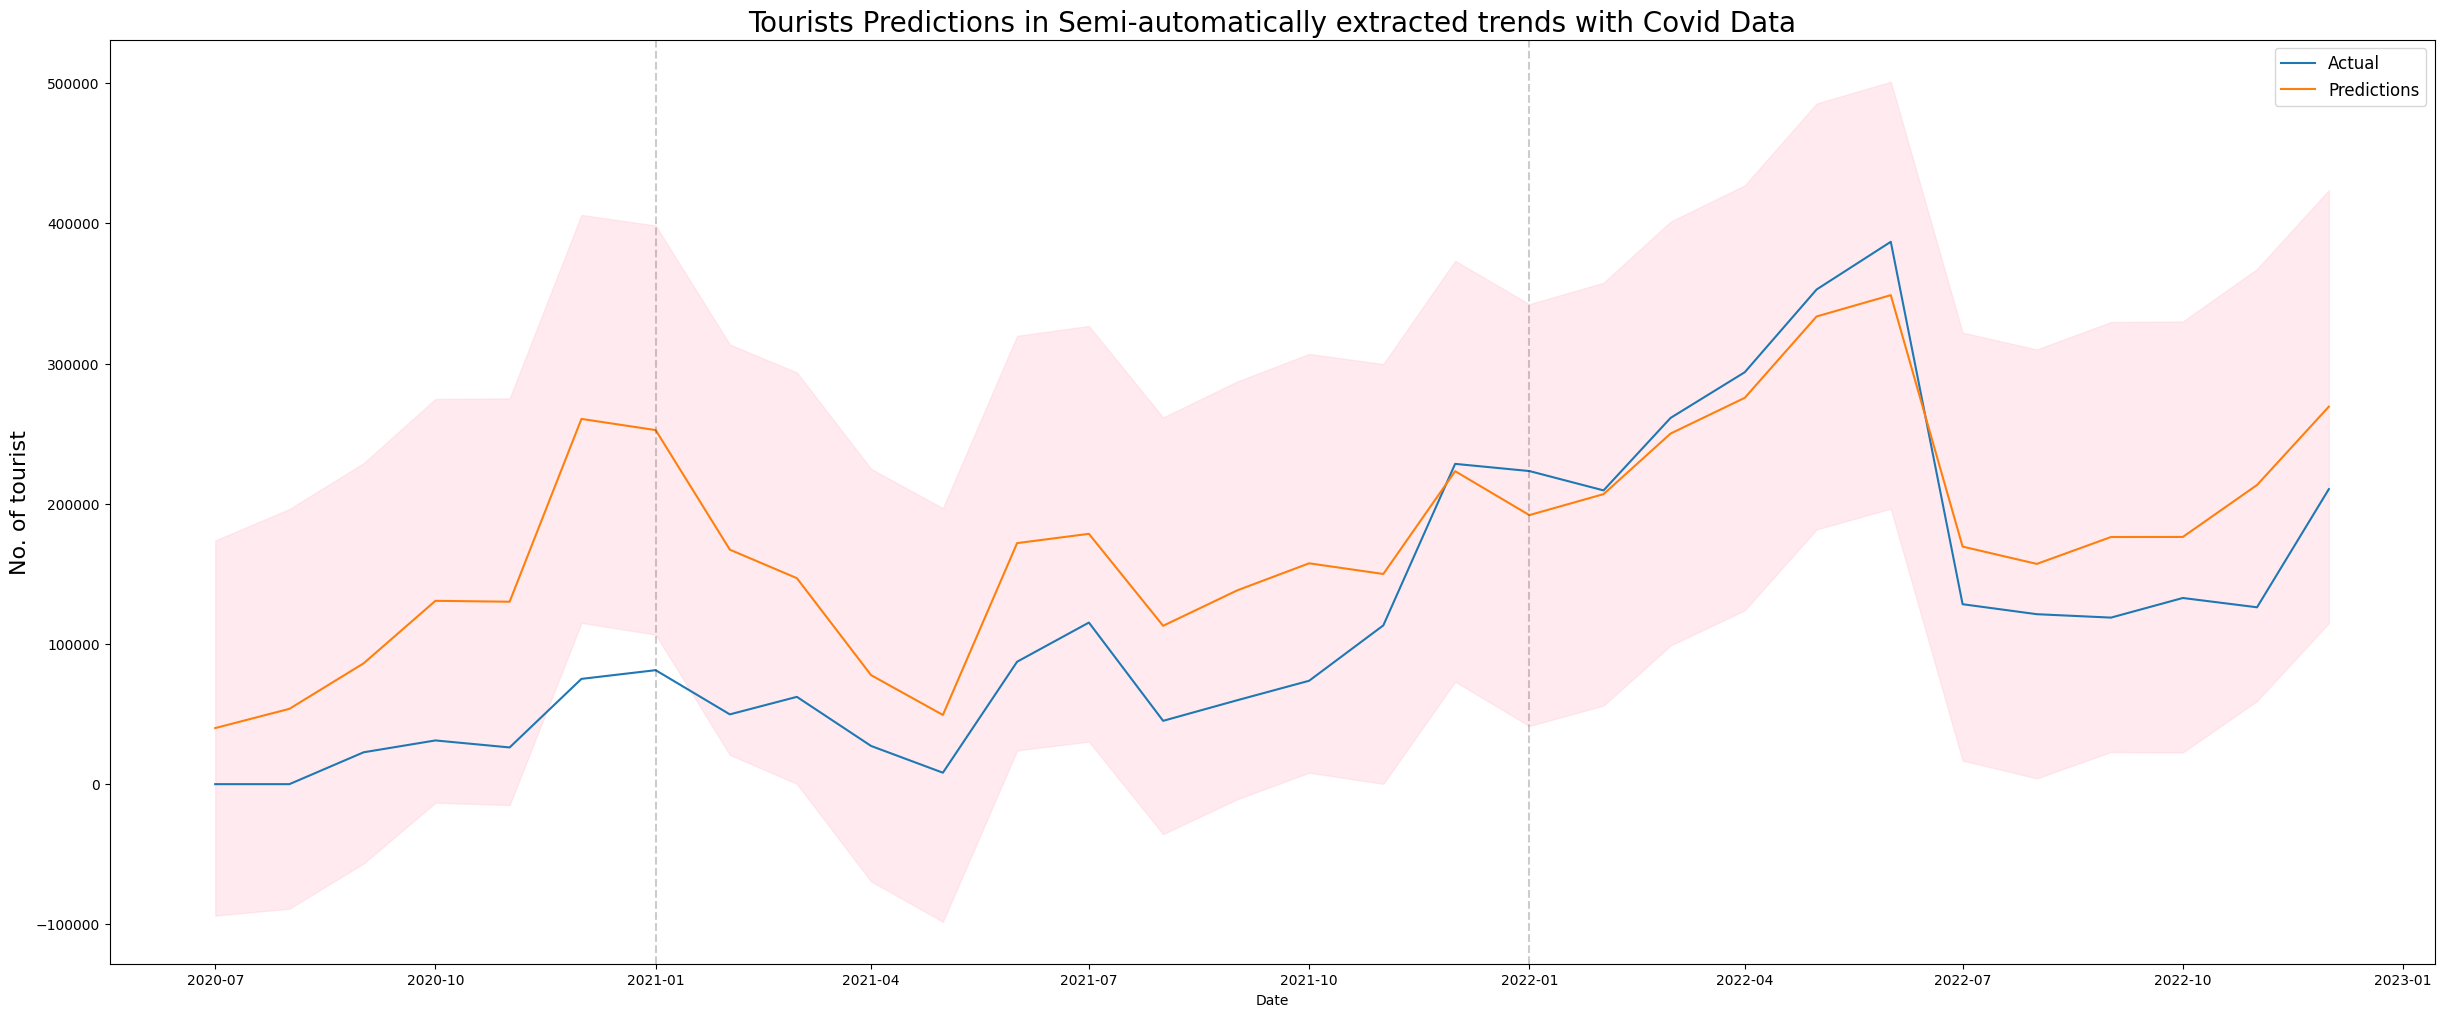

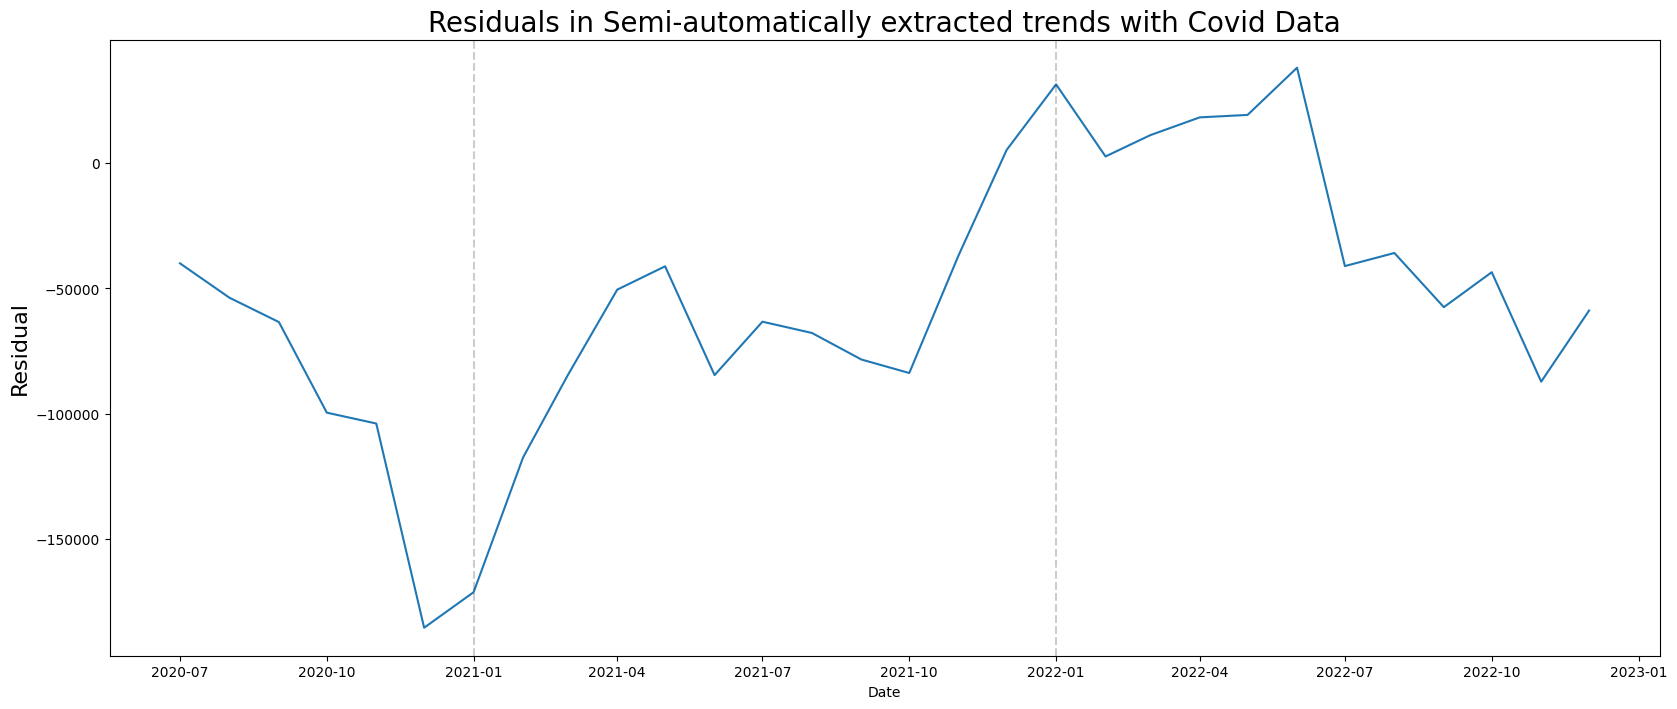

In [15]:
train_end = datetime(2020,6,1)
test_end = datetime(2022,12,1)
lim_tourist = tourist[start_date:test_end]
lim_df = fsa.drop(columns = 'No of Tourist')[start_date:test_end]

train_data = lim_tourist[:train_end]
test_data = lim_tourist[train_end + timedelta(days=1):test_end]
# test_data = pd.DataFrame(test_data, index=pd.date_range(start=(train_end + timedelta(days=1)).strftime('%m-%d-%Y'), end=test_end.strftime('%m-%d-%Y'), freq='MS'))

xtrain_data = (lim_df[:len(train_data)])
xtest_data = (lim_df[len(train_data):])


# To ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# My Variables

my_order = (3,1,1)
my_seasonal_order = (0, 0, 0, 0)
print('(p,d,q) = ', my_order)


#Define Model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order, exog=xtrain_data)

# Time to implement model and Fit Model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)
# print(model_fit.summary())

#Getting Predictions
predictions_ci = (model_fit.get_forecast(len(test_data), exog = xtest_data)).conf_int()
predictions = model_fit.forecast(len(test_data), exog = xtest_data)
predictions = pd.Series(predictions, index=test_data.index)
predictions = pd.DataFrame(predictions)

#Getting residuals
residuals= test_data['No of Tourist'] - predictions['predicted_mean']
residuals
residuals = pd.DataFrame(residuals)



#Getting Error in Data
rmse = math.sqrt(mean_squared_error(test_data , predictions))
print('RMSE =',rmse )

# Calculate MAE
mae = mean_absolute_error(test_data , predictions)
print("Mean Absolute Error:", mae)

# Calculate MAPE and MASE
mape = np.mean(np.abs((test_data.values - predictions.values) / ((test_data.values + predictions.values)/2))) * 100
print("Mean Absolute Percentage Error (MAPE):", mape, "%")
seasonal_naive = test_data['No of Tourist'].diff(12).abs().mean()
mase = mae / (seasonal_naive if seasonal_naive else mae)
print("Mean Absolute Scaled Error (MASE):", mase)


#Getting Trends Matching Data
first_diff_pred = predictions.diff()[1:]
first_diff_test = test_data.diff()[1:]
e = pd.DataFrame(dtype = 'int64')

first_diff_pred = np.sign(np.sign(first_diff_pred['predicted_mean']))
first_diff_test = np.sign(np.sign(first_diff_test['No of Tourist']))
e =  first_diff_test * first_diff_pred
print(f"Percentage Matched: {((e > 0).mean()) * 100}")


# Plotting Predictions

plt.figure(figsize=(30,12))

plt.plot(test_data)
plt.plot(predictions)
plt.fill_between(predictions_ci.index, predictions_ci.iloc[:, 0], predictions_ci.iloc[:, 1], color='pink', alpha=0.3)

plt.legend(('Actual', 'Predictions'), fontsize=12)

plt.title('Tourists Predictions in Semi-automatically extracted trends with Covid Data', fontsize=20)
plt.ylabel('No. of tourist', fontsize=16)
plt.xlabel('Date')
for year in range(train_end.year+1,test_end.year+1):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.show()

# Plotting residuals
plt.figure(figsize=(20,8))
plt.plot(residuals)
plt.title(('Residuals in Semi-automatically extracted trends with Covid Data'), fontsize=20)
plt.ylabel('Residual', fontsize=16)
plt.xlabel('Date')
for year in range(train_end.year +1,test_end.year+1):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.show()




Without Covid Data

(p,d,q) =  (3, 1, 1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23159D+01    |proj g|=  1.29912D-01

At iterate    5    f=  1.22950D+01    |proj g|=  1.10871D-02

At iterate   10    f=  1.22940D+01    |proj g|=  2.82116D-02


 This problem is unconstrained.



At iterate   15    f=  1.22858D+01    |proj g|=  2.48717D-02

At iterate   20    f=  1.22847D+01    |proj g|=  6.23181D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     23     26      1     0     0   3.477D-05   1.228D+01
  F =   12.284713800609198     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Fitting Time: 0.32091236114501953
RMSE = 40141.44988831248
Mean Absolute Error: 31863.71696118719
Mean Absolute Percentage Error (MAPE): 14.142259245926258 %
Mean Absolute Scaled Error (MASE): 2.327203841115057
Percentage Matched: 79.16666666666666


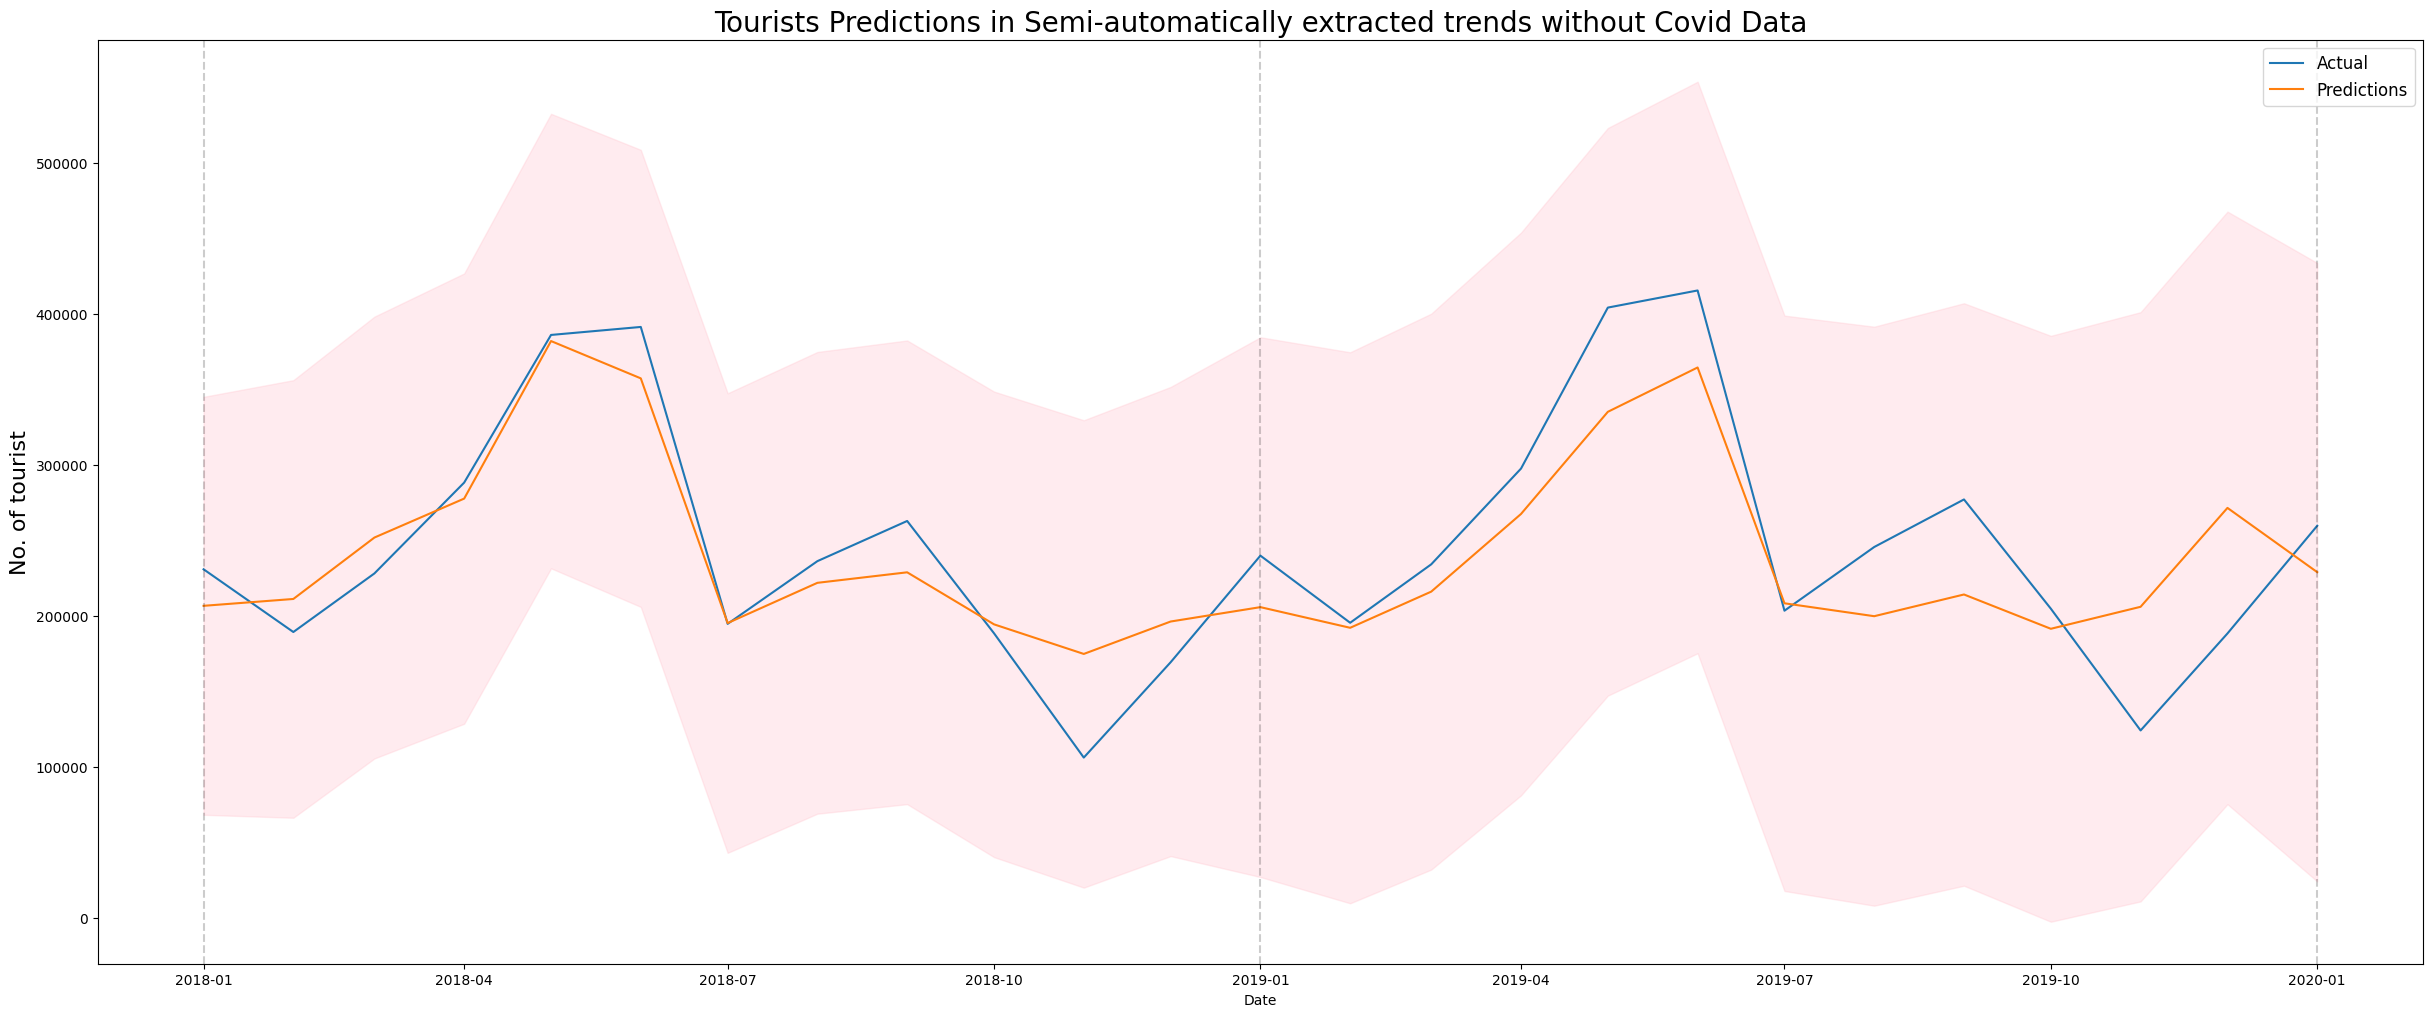

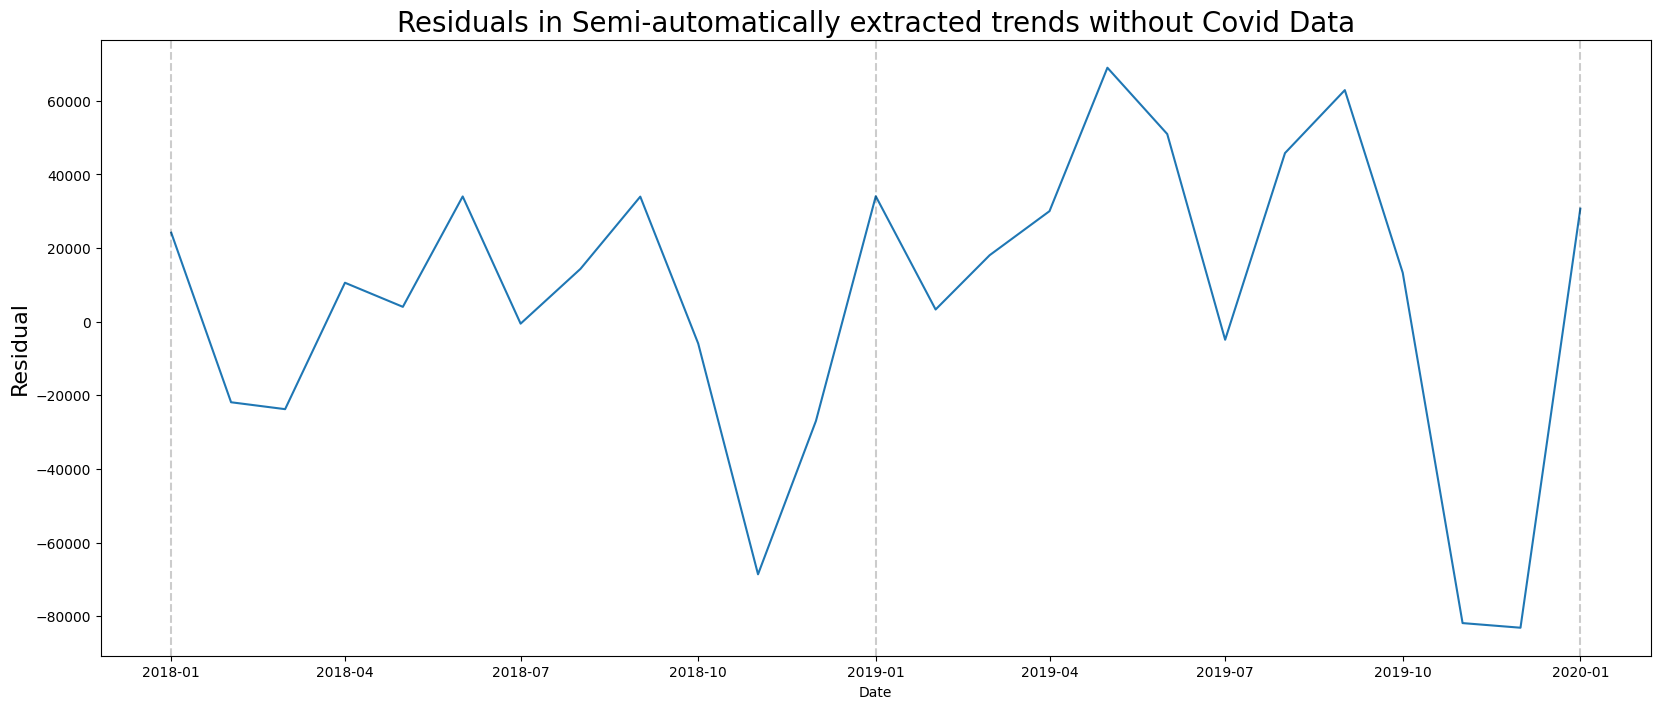

In [16]:
train_end = datetime(2017,12,1)
test_end = datetime(2020,1,1)
lim_tourist = tourist[start_date:test_end]
lim_df = fsa.drop(columns = 'No of Tourist')[start_date:test_end]

train_data = lim_tourist[:train_end]
test_data = lim_tourist[train_end + timedelta(days=1):test_end]
# test_data = pd.DataFrame(test_data, index=pd.date_range(start=(train_end + timedelta(days=1)).strftime('%m-%d-%Y'), end=test_end.strftime('%m-%d-%Y'), freq='MS'))

xtrain_data = (lim_df[:len(train_data)])
xtest_data = (lim_df[len(train_data):])


# To ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# My Variables

my_order = (3,1,1)
my_seasonal_order = (1, 0, 1, 12)
print('(p,d,q) = ', my_order)


#Define Model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order, exog=xtrain_data)

# Time to implement model and Fit Model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)
# print(model_fit.summary())

#Getting Predictions
predictions_ci = (model_fit.get_forecast(len(test_data), exog = xtest_data)).conf_int()
predictions = model_fit.forecast(len(test_data), exog = xtest_data)
predictions = pd.Series(predictions, index=test_data.index)
predictions = pd.DataFrame(predictions)

#Getting residuals
residuals= test_data['No of Tourist'] - predictions['predicted_mean']
residuals
residuals = pd.DataFrame(residuals)



#Getting Error in Data
rmse = math.sqrt(mean_squared_error(test_data , predictions))
print('RMSE =',rmse )

# Calculate MAE
mae = mean_absolute_error(test_data , predictions)
print("Mean Absolute Error:", mae)

# Calculate MAPE and MASE
mape = np.mean(np.abs((test_data.values - predictions.values ) / ((test_data.values + predictions.values)/2))) * 100
print("Mean Absolute Percentage Error (MAPE):", mape, "%")
seasonal_naive = test_data['No of Tourist'].diff(12).abs().mean()
mase = mae / (seasonal_naive if seasonal_naive else mae)
print("Mean Absolute Scaled Error (MASE):", mase)


#Getting Trends Matching Data
first_diff_pred = predictions.diff()[1:]
first_diff_test = test_data.diff()[1:]
e = pd.DataFrame(dtype = 'int64')

first_diff_pred = np.sign(np.sign(first_diff_pred['predicted_mean']))
first_diff_test = np.sign(np.sign(first_diff_test['No of Tourist']))
e =  first_diff_test * first_diff_pred
print(f"Percentage Matched: {((e > 0).mean()) * 100}")


# Plotting Predictions

plt.figure(figsize=(30,12))

plt.plot(test_data)
plt.plot(predictions)
plt.fill_between(predictions_ci.index, predictions_ci.iloc[:, 0], predictions_ci.iloc[:, 1], color='pink', alpha=0.3)

plt.legend(('Actual', 'Predictions'), fontsize=12)

plt.title('Tourists Predictions in Semi-automatically extracted trends without Covid Data', fontsize=20)
plt.ylabel('No. of tourist', fontsize=16)
plt.xlabel('Date')
for year in range(train_end.year+1,test_end.year+1):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.show()

# Plotting residuals
plt.figure(figsize=(20,8))
plt.plot(residuals)
plt.title(('Residuals in Semi-automatically extracted trends without Covid Data'), fontsize=20)
plt.ylabel('Residual', fontsize=16)
plt.xlabel('Date')
for year in range(train_end.year +1,test_end.year+1):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.show()





# Manual

In [17]:
data = {
    'Tourism': [],
    'Traffic': [],
    'Recreation': [],
    'Lodging':[],
    'Dining':[],
    'Shopping': []
}
features = pd.DataFrame(data)
features['Tourism'] = df2['manali sightseeing'] + df2['shimla images']+df2['Shimla Sightseeing places'] +df2['Shimla Hill Station: (India)'] +df2['shimla railway station: (India)']+df2['Shimla places to visit: (India)']+df2['Kalka Shimla Railway: (India)']+df2['shimla tourist places: (India)']+ df2['shimla trip: (India)']




features['Traffic'] =  df2['toy train to shimla'] + +df2['shimla manali'] +df2['delhi to shimla distance: (India)']+df2['Shimla distance from Delhi: (India)'] + df2['Delhi to Shimla by road: (India)']

features['Recreation'] = df2['best time to visit shimla']  + df2['places to visit shimla'] + df2['Sightseeing Shimla: (India)']+df2['shimla sightseeing: (India)'] + df2['Shimla places to visit: (India)'] +df2['summer hill: (India)']

features['Lodging'] = df2['kolkata to shimla: (India)'] + + df2['delhi to shimla']

features['Dining'] =df2['Shimla Package: (India)'] + +df2['hotel in shimla mall road: (India)']

features['Shopping'] = df2['shimla shopping: (India)']





with covid data

(p,d,q) =  (4, 1, 1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24547D+01    |proj g|=  6.39936D-02

At iterate    5    f=  1.24522D+01    |proj g|=  2.31082D-02

At iterate   10    f=  1.24339D+01    |proj g|=  6.82967D-02

At iterate   15    f=  1.24151D+01    |proj g|=  6.66680D-03

At iterate   20    f=  1.24148D+01    |proj g|=  1.67988D-04


 This problem is unconstrained.



At iterate   25    f=  1.24148D+01    |proj g|=  3.60564D-03

At iterate   30    f=  1.24097D+01    |proj g|=  1.04791D-02

At iterate   35    f=  1.24092D+01    |proj g|=  7.50392D-05

At iterate   40    f=  1.24092D+01    |proj g|=  4.13107D-03
  ys=-1.048E-03  -gs= 9.083E-05 BFGS update SKIPPED

At iterate   45    f=  1.24070D+01    |proj g|=  1.98869D-02

At iterate   50    f=  1.24066D+01    |proj g|=  1.45276D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     63      1     1     0   1.453D-03   1.241D+01
  F =   12.406585642054374     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

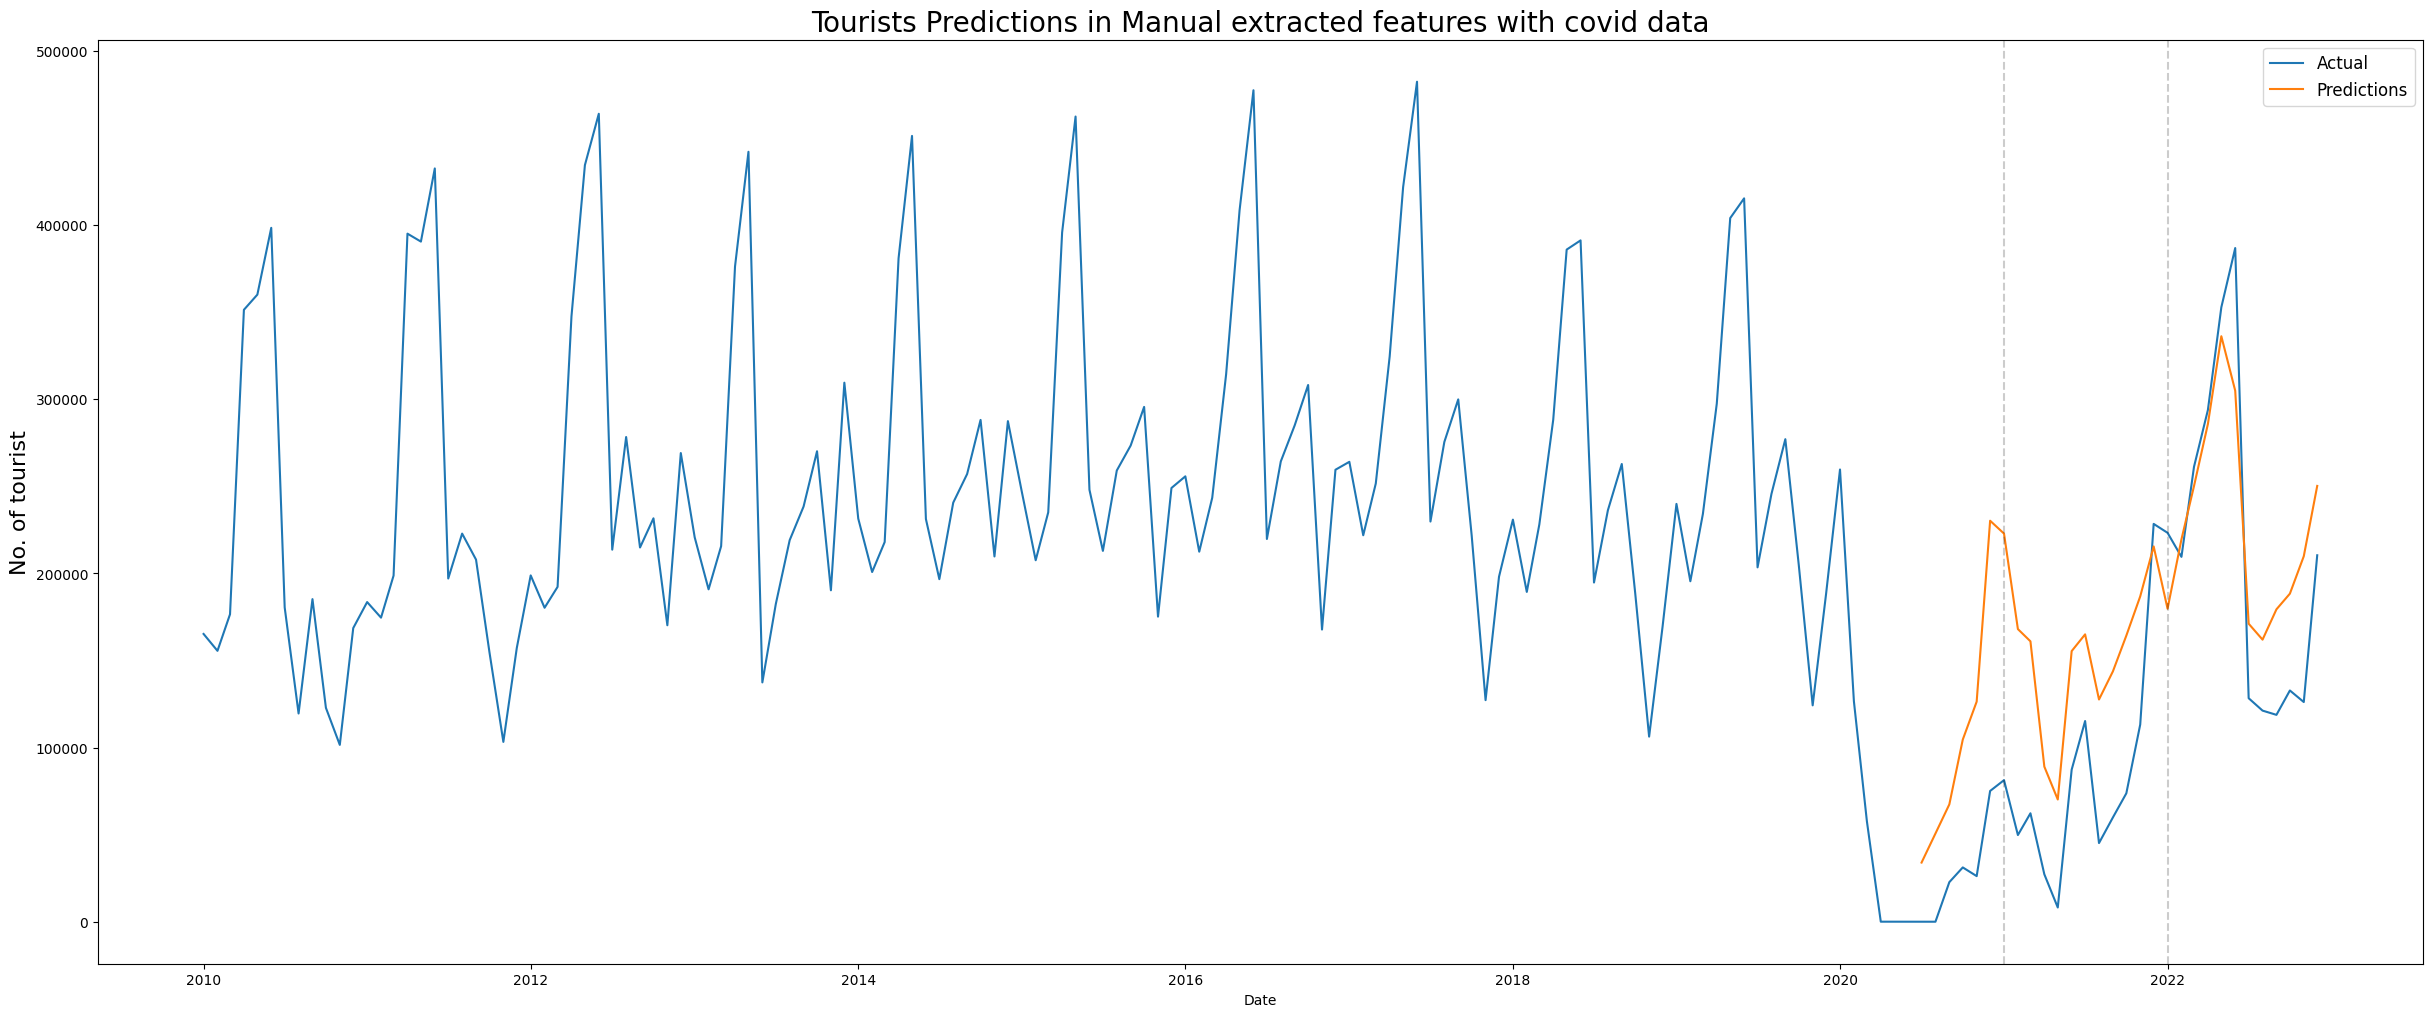

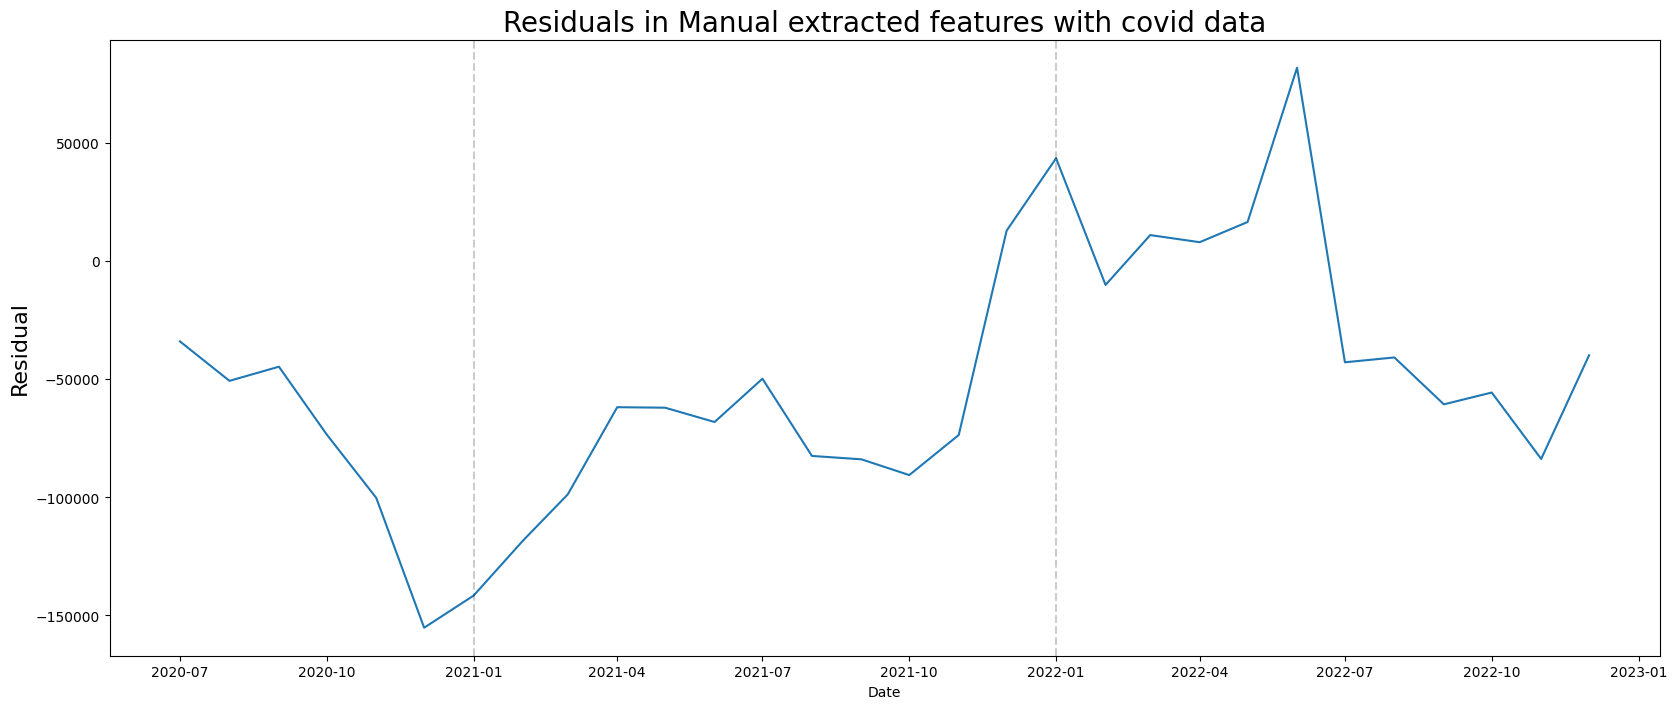

In [18]:
train_end = datetime(2020,6,1)
test_end = datetime(2022,12,1)
lim_tourist = tourist[start_date:test_end]
lim_df = features[start_date:test_end]

train_data = lim_tourist[:train_end]
test_data = lim_tourist[train_end + timedelta(days=1):test_end]
# test_data = pd.DataFrame(test_data, index=pd.date_range(start=(train_end + timedelta(days=1)).strftime('%m-%d-%Y'), end=test_end.strftime('%m-%d-%Y'), freq='MS'))

xtrain_data = (lim_df[:len(train_data)])
xtest_data = (lim_df[len(train_data):])


# To ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# My Variables

my_order = (4,1,1)
my_seasonal_order = (0, 0, 0, 0)
print('(p,d,q) = ', my_order)


#Define Model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order, exog=xtrain_data)

# Time to implement model and Fit Model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)
# print(model_fit.summary())

#Getting Predictions
predictions_ci = (model_fit.get_forecast(len(test_data), exog = xtest_data)).conf_int()
predictions = model_fit.forecast(len(test_data), exog = xtest_data)
predictions = pd.Series(predictions, index=test_data.index)
predictions = pd.DataFrame(predictions)

#Getting residuals
residuals= test_data['No of Tourist'] - predictions['predicted_mean']
residuals
residuals = pd.DataFrame(residuals)



#Getting Error in Data
rmse = math.sqrt(mean_squared_error(test_data , predictions))
print('RMSE =',rmse )

# Calculate MAE
mae = mean_absolute_error(test_data , predictions)
print("Mean Absolute Error:", mae)

# Calculate MAPE and MASE
mape = np.mean(np.abs((test_data.values - predictions.values) / ((test_data.values + predictions.values)/2))) * 100
print("Mean Absolute Percentage Error (MAPE):", mape, "%")
seasonal_naive = test_data['No of Tourist'].diff(12).abs().mean()
mase = mae / (seasonal_naive if seasonal_naive else mae)
print("Mean Absolute Scaled Error (MASE):", mase)


#Getting Trends Matching Data
first_diff_pred = predictions.diff()[1:]
first_diff_test = test_data.diff()[1:]
e = pd.DataFrame(dtype = 'int64')

first_diff_pred = np.sign(np.sign(first_diff_pred['predicted_mean']))
first_diff_test = np.sign(np.sign(first_diff_test['No of Tourist']))
e =  first_diff_test * first_diff_pred
print(f"Percentage Matched: {((e > 0).mean()) * 100}")


# Plotting Predictions

plt.figure(figsize=(30,12))

plt.plot(tourist)
plt.plot(predictions)
# plt.fill_between(predictions_ci.index, predictions_ci.iloc[:, 0], predictions_ci.iloc[:, 1], color='pink', alpha=0.3)

plt.legend(('Actual', 'Predictions'), fontsize=12)

plt.title('Tourists Predictions in Manual extracted features with covid data', fontsize=20)
plt.ylabel('No. of tourist', fontsize=16)
plt.xlabel('Date')
for year in range(train_end.year+1,test_end.year+1):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.show()

# Plotting residuals
plt.figure(figsize=(20,8))
plt.plot(residuals)
plt.title(('Residuals in Manual extracted features with covid data'), fontsize=20)
plt.ylabel('Residual', fontsize=16)
plt.xlabel('Date')
for year in range(train_end.year +1,test_end.year+1):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.show()




Without Covid Data

(p,d,q) =  (3, 1, 1) (1, 1, 2, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07238D+01    |proj g|=  1.04408D-01


 This problem is unconstrained.



At iterate    5    f=  1.07133D+01    |proj g|=  6.53734D-02

At iterate   10    f=  1.06692D+01    |proj g|=  1.30341D-02

At iterate   15    f=  1.06682D+01    |proj g|=  4.55246D-03

At iterate   20    f=  1.06677D+01    |proj g|=  1.87705D-03

At iterate   25    f=  1.06677D+01    |proj g|=  7.56093D-04

At iterate   30    f=  1.06668D+01    |proj g|=  1.51818D-02

At iterate   35    f=  1.06425D+01    |proj g|=  2.50850D-02

At iterate   40    f=  1.06402D+01    |proj g|=  1.83529D-03

At iterate   45    f=  1.06393D+01    |proj g|=  1.58161D-02

At iterate   50    f=  1.06358D+01    |proj g|=  3.13947D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

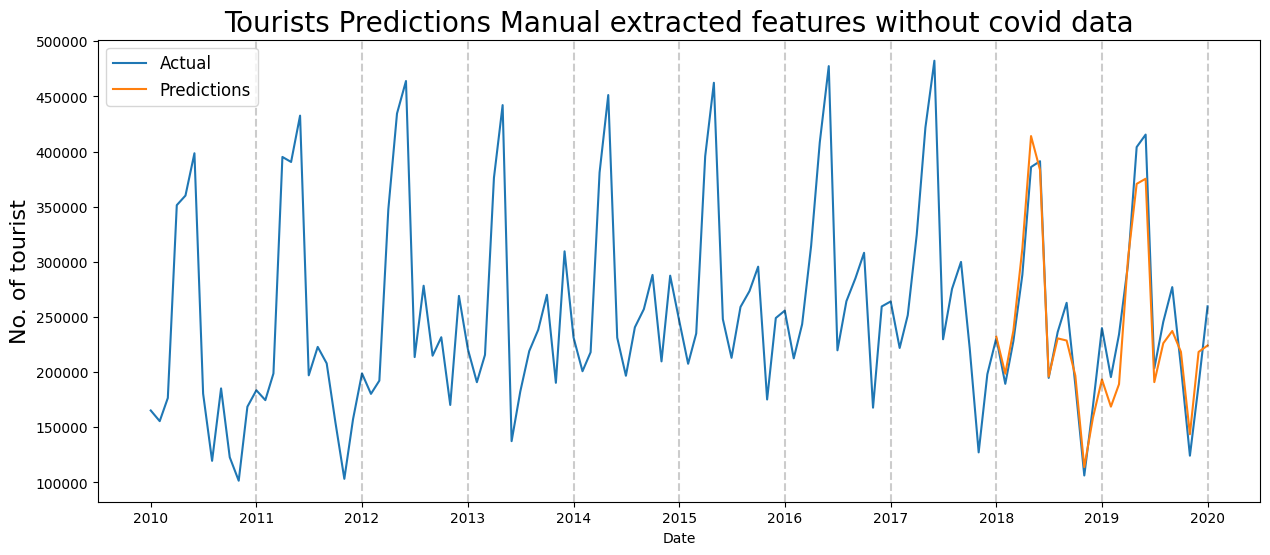

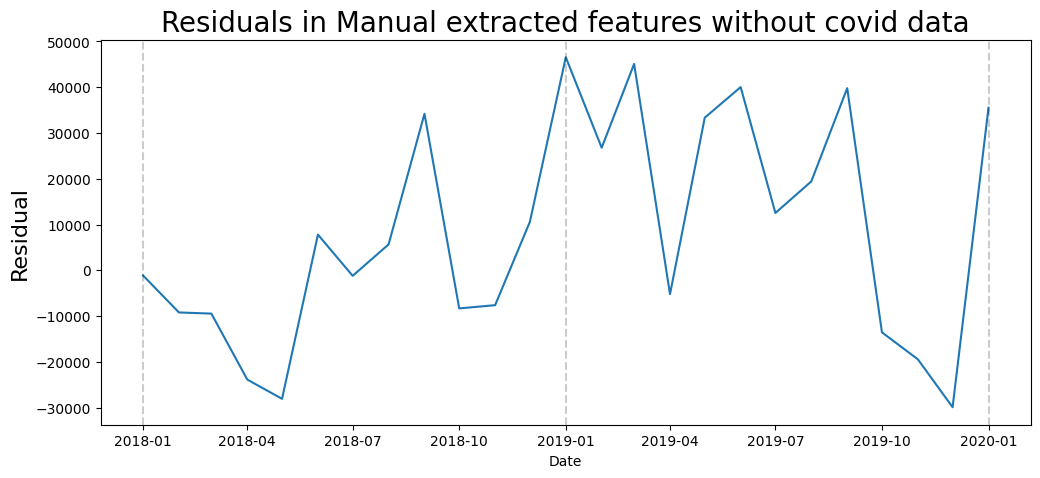

In [19]:
train_end = datetime(2017,12,1)
test_end = datetime(2020,1,1)
lim_tourist = tourist[start_date:test_end]
lim_df = features[start_date:test_end]

train_data = lim_tourist[:train_end]
test_data = lim_tourist[train_end + timedelta(days=1):test_end]
# test_data = pd.DataFrame(test_data, index=pd.date_range(start=(train_end + timedelta(days=1)).strftime('%m-%d-%Y'), end=test_end.strftime('%m-%d-%Y'), freq='MS'))

xtrain_data = (lim_df[:len(train_data)])
xtest_data = (lim_df[len(train_data):])


# To ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# My Variables
my_order = (3,1,1)
my_seasonal_order = (1, 1, 2, 12)
print('(p,d,q) = ', my_order , my_seasonal_order)


#Define Model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order, exog=xtrain_data)

# Time to implement model and Fit Model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)
# print(model_fit.summary())

#Getting Predictions
predictions_ci = (model_fit.get_forecast(len(test_data), exog = xtest_data)).conf_int()
predictions = model_fit.forecast(len(test_data), exog = xtest_data)
predictions = pd.Series(predictions, index=test_data.index)
predictions = pd.DataFrame(predictions)

#Getting residuals
residuals= test_data['No of Tourist'] - predictions['predicted_mean']
residuals
residuals = pd.DataFrame(residuals)



#Getting Error in Data
rmse = math.sqrt(mean_squared_error(test_data , predictions))
print('RMSE =',rmse )

# Calculate MAE
mae = mean_absolute_error(test_data , predictions)
print("Mean Absolute Error:", mae)

# Calculate MAPE and MASE
mape = np.mean(np.abs((test_data.values - predictions.values)) / ((test_data.values + predictions.values)/2)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape, "%")
seasonal_naive = test_data['No of Tourist'].diff(12).abs().mean()
mase = mae / (seasonal_naive if seasonal_naive else mae)
print("Mean Absolute Scaled Error (MASE):", mase)


#Getting Trends Matching Data
first_diff_pred = predictions.diff()[1:]
first_diff_test = test_data.diff()[1:]
e = pd.DataFrame(dtype = 'int64')

first_diff_pred = np.sign(np.sign(first_diff_pred['predicted_mean']))
first_diff_test = np.sign(np.sign(first_diff_test['No of Tourist']))
e =  first_diff_test * first_diff_pred
print(f"Percentage Matched: {((e > 0).mean()) * 100}")


# Plotting Predictions

plt.figure(figsize=(15,6))
# plt.plot(test_data)
plt.plot(lim_tourist)
plt.plot(predictions)
# plt.fill_between(predictions_ci.index, predictions_ci.iloc[:, 0], predictions_ci.iloc[:, 1], color='pink', alpha=0.3)

plt.legend(('Actual', 'Predictions'), fontsize=12)

plt.title('Tourists Predictions Manual extracted features without covid data', fontsize=20)
plt.ylabel('No. of tourist', fontsize=16)
plt.xlabel('Date')
for year in range(2011,test_end.year+1):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.show()

# Plotting residuals
plt.figure(figsize=(12,5))
plt.plot(residuals)
plt.title(('Residuals in Manual extracted features without covid data'), fontsize=20)
plt.ylabel('Residual', fontsize=16)
plt.xlabel('Date')
for year in range(train_end.year +1,test_end.year+1):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.show()



